In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Name and movies datasets

For this project we decided to work on the CMU movie dataset containing metadata extracted from Freebase, including Movie metadata like Movie box office revenue, genre, release date, runtime, and language but also Character metada like character names and aligned information about the actors who portray them, including gender and estimated age at the time of the movie's release. 
First let's see what the 2 metadasets contains.

#### Characters
The dataset contains informations  450,669 characters aligned to the movies such as Wikipedia movie ID,  Freebase movie ID, Movie release date, Character name, Actor date of birth, Actor gender, Actor height (in meters), Actor ethnicity,Actor name, Actor age at movie release, Freebase character/actor map ID, Freebase character ID, Freebase actor ID. 


#### Movies
The dataset contains informations on 81,741 movies such as the Wikipedia movie ID, Freebase movie ID, Movie name, Movie release date, Movie box office revenue, Movie runtime, Movie languages, Movie countries, Movie genres .



## Cleaning

The cleaning task was implement in the *clean_raw_data()* method of our different CharacterData and MovieData classes implementation (by Wikipedia Movie ID) and validated using the *check_clean_data()* method, available and shared by the 2 datasets (python inheritance).

From both metadataset, we directly oberved similar features such as Wikipedia Movie ID and Freebase Movie ID that is useful for futur merge of the 2 dataset. However, as in both datasets we saw that there were several columns containing Freebase and Wikipedia IDs for actors, characters and films, we decided to put them aside as the data is too difficult to access.

This are the different steps we applied to both datasets before merging:

Character dataset:
- Load with the right spacer.
- Rename the columns for proper understanding.
- Check the good type format : Actor date of birth and the Release Date as a datetime, and the other into objects.
- Deal with missing values : we wrote them as NaN or NaT
- Droping unwanted columns
- Checking that the cleaning was made

Movie dataset :
- Load with the right spacer.
- Rename the columns for proper understanding.
- Modify the Language, Country and Genre columns:  the information was a JSON format not readable nor accessible so we isolate the information and replace it by a human-readable string format.
- Modify the datatypes of movie runtime into timedelta and the release date into a datetime object for further manipulation.
- Modify the movie Name, Language, Country and Genre:  we checked that they were in object type and modified them if not.
- Deal with missing values : we wrote them as NaN or NaT
- Dropping the unwanted columns
- Check that the cleaning was made


We kept the whole dataset with NaN and NaT values in a specific file to keep features that could be interesting even if the rate of missing values is very high (such as etchnicity or Box office revenue). However, for the following notebook, to make some we decided to remove this 2 columns since they have more than 70% missing values.


## Demo

Here, we will import and clean the data base to demonstrate the process.


In [2]:
# imports my code from the file src/data/movies_char_data.py
import src.data.movies_char_data as MovieChar

#### Characters 

In [3]:
character_df = MovieChar.CharacterData("Character", "character.metadata.tsv", output_name = "character_data_clean.csv")
character_df.raw_df.head()

Character : loaded 450668 rows !


,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,Unnamed: 7,Wanda De Jesus,42,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft


In [4]:
# print duplicated rows
character_df.clean_raw_data()
character_df.clean_df.head()

Character : Cleaning the raw data


,Wikipedia_movie_ID,Release_date,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
0,975900,2001-08-24,LIEUTENANT MELANIE BALLARD,1974-08-15,F,1.780,NATASHA HENSTRIDGE,27.0
1,975900,2001-08-24,DESOLATION WILLIAMS,1969-06-15,M,1.727,ICE CUBE,32.0
2,975900,2001-08-24,SGT JERICHO BUTLER,1967-09-12,M,1.750,JASON STATHAM,33.0
3,975900,2001-08-24,BASHIRA KINCAID,1977-09-25,F,1.650,CLEA DUVALL,23.0
4,975900,2001-08-24,COMMANDER HELENA BRADDOCK,1949-05-26,F,1.727,PAM GRIER,52.0


In [5]:
character_df.pipeline()

Character : loaded 450668 rows !
Character : Cleaning the raw data
Character : Clean data has been and saved to data/clean/movies_char/character_data_clean.csv! (171826 rows)


####  Movie dataset

In [6]:
movie_df = MovieChar.MovieData("Movie", "movie.metadata.tsv", output_name = "movie_data_clean.csv")

#Display name and file_name
print(movie_df.name, movie_df.file_name)

movie_df.raw_df.head()

Movie : loaded 81740 rows !
Movie movie.metadata.tsv


,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [7]:
# print duplicated rows
movie_df.clean_raw_data()
movie_df.clean_df.head()

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
1,28463795,Brun bitter,NaT,NaN,0 days 01:23:00,Norwegian,Norway,"Crime Fiction, Drama"
2,9363483,White Of The Eye,NaT,NaN,0 days 01:50:00,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
3,261236,A Woman in Flames,NaT,NaN,0 days 01:46:00,German,Germany,Drama
4,13696889,The Gangsters,1913-05-29,NaN,0 days 00:35:00,"Silent film, English",United States of America,"Short Film, Silent film, Indie, Black-and-whit..."


In [8]:
movie_df.pipeline()

Movie : loaded 81740 rows !
Movie : Clean data has been and saved to data/clean/movies_char/movie_data_clean.csv! (81740 rows)


## Merging Movie and Character into one dataset

We merged the 2 dataset following the Wikipedi movie ID.

In [9]:
from src.utils.movies_utils import *

mov_char_data = merge_movies_characters_data(movie_df, character_df)

mov_char_data.head() # When we call the data name object, it returns the cleaned data

Duplicates found: 412 duplicates ! removing them...


,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",POLICE OFFICER,NaT,M,NaN,ALLEN CUTLER,NaN
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",REPORTER,1956-12-19,F,NaN,ALICE BARRETT,43.0
2,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",FBI PROFILER ROBERT HANKS,1950-01-05,M,NaN,ROBERT CATRINI,50.0
3,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",JOHN RAMSEY,1945-02-12,M,1.85,CLIFF DEYOUNG,55.0
4,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",PATSY RAMSEY,1964-07-12,F,1.63,JUDI EVANS,35.0


In [10]:
# Print size of the dataset
print(mov_char_data.shape)

(171400, 14)


In [11]:
mov_char_data.head(100) # When we call the data name object, it returns the cleaned data
      

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",POLICE OFFICER,NaT,M,NaN,ALLEN CUTLER,NaN
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",REPORTER,1956-12-19,F,NaN,ALICE BARRETT,43.0
2,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",FBI PROFILER ROBERT HANKS,1950-01-05,M,NaN,ROBERT CATRINI,50.0
3,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",JOHN RAMSEY,1945-02-12,M,1.85,CLIFF DEYOUNG,55.0
4,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",PATSY RAMSEY,1964-07-12,F,1.63,JUDI EVANS,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1364293,They Knew What They Wanted,NaT,932000.0,0 days 01:36:00,English,United States of America,"Romance Film, Marriage Drama, Drama, Black-and...",AMY PETERS,1908-10-06,F,1.61,CAROLE LOMBARD,31.0
96,29772142,Karayilekku Oru Kadal Dooram,2010-12-31,NaN,0 days 01:50:00,Malayalam,India,Drama,GATHA,1985-11-14,F,1.65,MAMTA MOHANDAS,25.0
97,29772142,Karayilekku Oru Kadal Dooram,2010-12-31,NaN,0 days 01:50:00,Malayalam,India,Drama,SATHYABHAMA,1985-09-17,F,NaN,DHANYA MARY VARGHESE,25.0
98,26878691,Mysterious Island,NaT,NaN,0 days 01:40:00,Standard Mandarin,Hong Kong,"Action/Adventure, Wuxia, Martial Arts Film, Ch...",OUYANG FENG,NaT,M,NaN,WONG LIK,NaN


# Names datasets

In order to answer our research questions, we needed to find some birth registries from different countries. Those were freely available and we found datasets for the following countries:

- France
- USA
- United Kingdom
- AJOUTER AUTRE SI BESOIN

Since they all came from different places and didn't follow the same structure, we had to decide what kind of data was necessary for our project and what structure would be the most practical to work with. We ended-up with the following collumns in our dataframes:

1. **Year** : An integer value giving the year of the count 
2. **Name** :  A string representing the name that was counted
3. **Sex** : There are two possible characters, 'F' (female) and 'M' (male)
4. **Count** : An integer value giving the count of the name during this year

## Data homogenization

The cleaning task was implement in the *clean_raw_data()* method of our different NamesData classes implementation (by country) and validated using the *check_clean_data()* method, available and shared by all the name datasets (python inheritance).

### Column structure
This task was not too difficult since it was mostly reordering, renaming the ones needed and dropping the ones that were not useful for our project. We also made sure that the same type was used on the collumns of the different datasets. 

### Year 
All of our dataset had the same year format, but some had missing values in this field, which made those row useless and they were therefore discarded.
This collumn made it hard to find datasets from more countries, since a lot of them started to count only in the early 2000's, which doesn't give us enough data to detect real changes in the distribution. (The movie data base ends in 2012)

### Name
This was the hardest column to sanitize and clean since a lot of variation of a same name are possible. We ended by defining a regex expression do define what we would accept as a valid name : ^[A-Z-\s\']+$

This allows us to limit ourselves to names composed only of capitalized letters, spaces, '-' for composed names and ''' for the some regional variations. This rule is really strict and would have made us lose a considerable proportion of our dataset. This is where the data cleaning process came to help homogenize our data and it mainly consisted of the following operations:

- Converting all the name to uppercase
- Removing all accents on letter, for example é becomes e.

Some names have different spellings, for example you can write JEREMY and JEREMIE, but we decided to count this as two separate entries since grouping "similar" is out of the scope of this project and is not an uniformised concept.

### Sex
The french dataset had some integer values that we converted to the expected format. This field is useful for our research questions, but complicated the dataset research, since a lot of countries did not include this information in their registries.

### Validation

The python class representing our datasets contains a method *check_clean_data()* that checks multiple conditions to be sure that the data is uniform. 

- Checks the collumns' name
- Checks if some missing values are present
- Checks the data type of each collumn
- Checks for duplicated rows (same name, same sex and same name)
- Checks that the strings respects the defined regex expressions
- Checks that the counts and years are coherent numbers 

## Demo

Here, we will import and clean the data base to demonstrate the process.


In [12]:
import src.data.names_data as NamesData
ukNames = NamesData.UKNamesData("UK", "ukbabynames.csv")

# The raw data directly from the file
ukNames.raw_df.head()

UK : loaded 565817 rows !


,year,sex,name,n,rank,nation
0,1996.0,F,SOPHIE,7087.0,1.0,England & Wales
1,1996.0,F,CHLOE,6824.0,2.0,England & Wales
2,1996.0,F,JESSICA,6711.0,3.0,England & Wales
3,1996.0,F,EMILY,6415.0,4.0,England & Wales
4,1996.0,F,LAUREN,6299.0,5.0,England & Wales


In [13]:
# We can call the cleaning method, which will correct the columns' names and ordering, and clean the content
ukNames.clean_raw_data()
ukNames().head() #  This is the cleaned data

UK : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1974,AALIA,F,1
1,1974,AAMIR,M,1
2,1974,AARON,M,17
3,1974,ABADAH,F,1
4,1974,ABBEY,F,1


In [14]:
frenchNames = NamesData.FranceNamesData("France", "france.csv", "https://www.insee.fr/fr/statistiques/8205621?sommaire=8205628#dictionnaire", ";")

frenchNames.raw_df.head()

France : loaded 3884324 rows !


,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,38
2,1,AADEL,XXXX,XX,56
3,1,AADHIRAN,2023,93,5
4,1,AADHIRAN,XXXX,XX,15


In [15]:
frenchNames.clean_raw_data()
frenchNames().head()


France : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1900,ABEL,M,382
1,1900,MARIE-ANNE,F,42
2,1900,MARIE-ANTOINETTE,F,61
3,1900,MARIE-EUGENIE,F,3
4,1900,MARIE-FRANCOISE,F,20


In [16]:
USNames = NamesData.USNamesData("US", "babyNamesUSYOB-full.csv")
USNames.raw_df.head()

US : loaded 1858689 rows !


,YearOfBirth,Name,Sex,Number
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [17]:
USNames.clean_raw_data()
USNames().head()

US : Data is clean and conforms to the expected structure !


,Year,Name,Sex,Count
0,1880,MARY,F,7065
1,1880,ANNA,F,2604
2,1880,EMMA,F,2003
3,1880,ELIZABETH,F,1939
4,1880,MINNIE,F,1746


### Merging the datasets
If we want to answer a question with no regards to the provenance of the names, we can use our function to group all the datasets together

In [18]:
from src.utils.names_utils import merge_names_data

global_names = merge_names_data([ukNames, frenchNames, USNames])
print(f"The merged dataset contains {global_names().shape[0]} rows ! ")

UK : Data is clean and conforms to the expected structure !
France : Data is clean and conforms to the expected structure !
US : Data is clean and conforms to the expected structure !
UK & France & US : Data is clean and conforms to the expected structure !
The merged dataset contains 2227359 rows ! 


In [59]:
global_names().head()

,Year,Name,Sex,Count
0,1880,AARON,M,102
1,1880,AB,M,5
2,1880,ABBIE,F,71
3,1880,ABBOTT,M,5
4,1880,ABBY,F,6


## Feature Visualization

Lets visualize the different information from the datasets.

In [19]:
from src.utils.data_utils import *

In [20]:
# Number of Nan values in the Movies & Character dataset
mov_char_data.isna().sum()

Wikipedia_movie_ID         0
Movie_name                 0
Release_date           40177
Revenue               113277
Runtime                15220
Languages                  0
Countries                  0
Genres                  5666
Character_name             0
Actor_DOB              42769
Actor_gender            6131
Actor_height           93950
Actor_name                 0
Actor_age              51370
dtype: int64

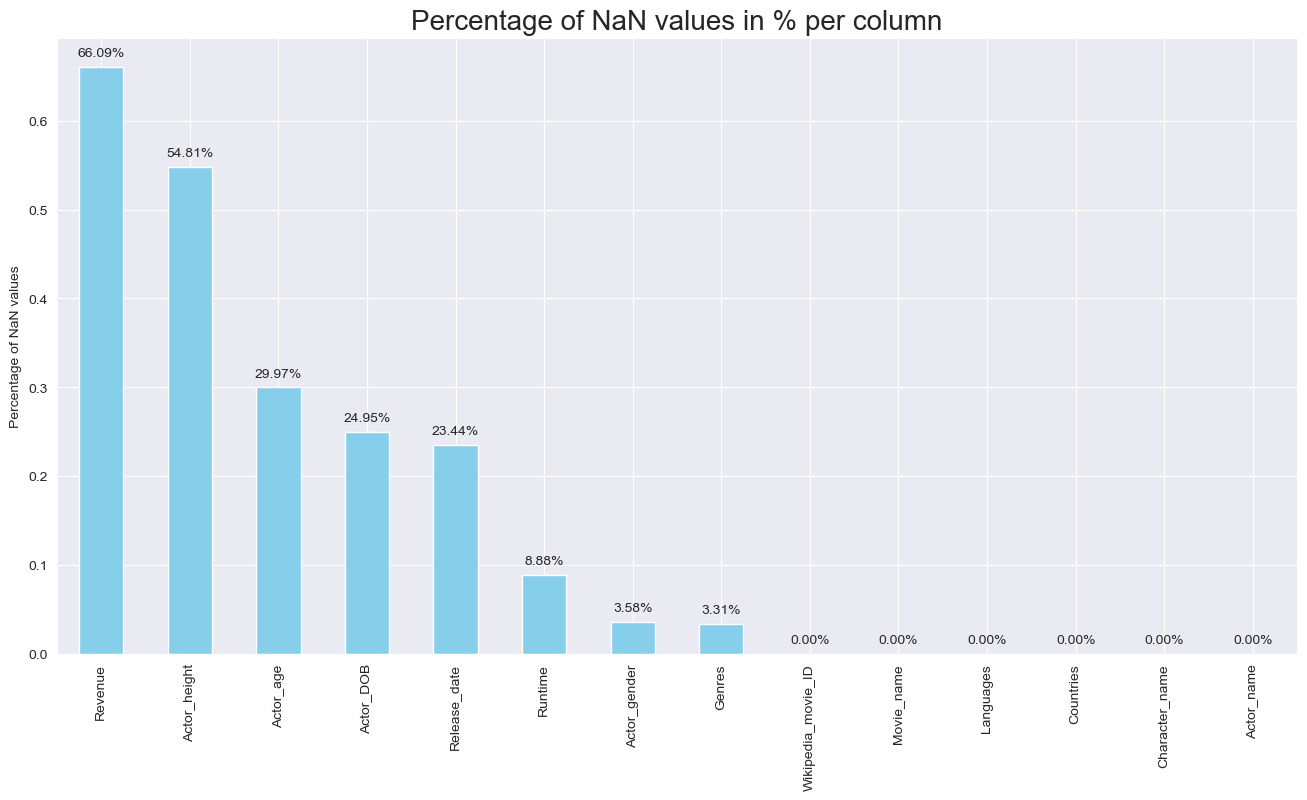

In [21]:
# Visualizing the number of missing values per columns
nan_percentage = mov_char_data.isnull().mean().sort_values(ascending=False)

# Plot the percentage of NaN values per column
ax = nan_percentage.plot(kind='bar', figsize=(16, 8), color='skyblue')
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values in % per column', fontsize=20)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

This graph illustrates the distribution of columns based on the percentage of NaN values present in each. It helps us understand how missing data is spread across different features, highlighting columns with higher or lower levels of incompleteness

Top 50 movies revenue 
This graph displays the top 50 movies based only on the revenue.

In [22]:
# Descriptive statistics for each column in dataframe with .head() method
mov_char_data.describe(include='all').head()

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
count,1.714000e+05,171400,131223,5.812300e+04,156180,171400,171400,165734,171400,128631,165269,77450.000000,171400,120030.00000
unique,NaN,29805,NaN,NaN,NaN,1140,1240,13912,108621,NaN,2,NaN,66936,NaN
top,NaN,Hemingway & Gellhorn,NaN,NaN,NaN,English,United States of America,Drama,DOCTOR,NaN,M,NaN,MEL BLANC,NaN
freq,NaN,101,NaN,NaN,NaN,95902,80157,10412,186,NaN,104790,NaN,505,NaN
mean,1.329812e+07,NaN,1991-12-11 02:33:08.925721984,9.449211e+07,0 days 01:51:56.190055064,NaN,NaN,NaN,NaN,1951-03-04 10:35:32.443967616,NaN,1.780589,NaN,36.96565


#### Information about actor age

We have here histogram plots showing the distribution of 3 features of the dataset: Actor age at the time of the movie release, Actor height and  Revenue of the movies.


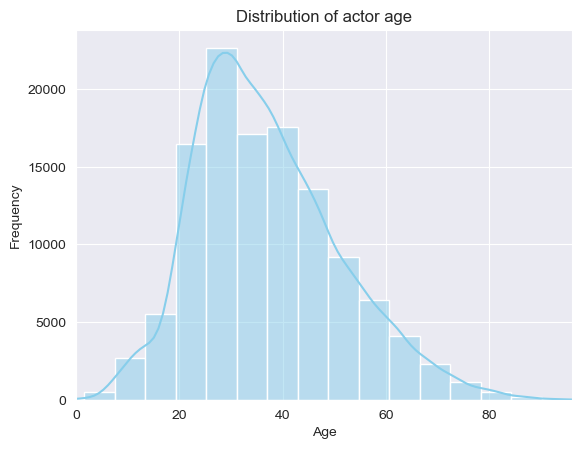

In [23]:
# Distribution of actor age
sns.histplot(mov_char_data['Actor_age'], color='skyblue', kde=True, bins=30)
plt.xlim(0, mov_char_data['Actor_age'].max())
plt.title('Distribution of actor age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


Comment: The distribution of Actor age is approximately normal with a peak around the age of 30. This suggests that most actors are around 30 years old at the time of the movie release, with fewer actors being significantly younger or older.

Let's check the type of distribution and the skewness of the data.

In [24]:
check_normality(mov_char_data['Actor_age'])
check_skewness(mov_char_data['Actor_age'])

Anderson-Darling Test Results:
  Statistic: 851.546
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]
  Conclusion: Data does not look Gaussian (reject H0)
The skewness score is: 0.5583759746602152 :
the distribution is right skewed


#### Information about actor height

Text(0, 0.5, 'Frequency')

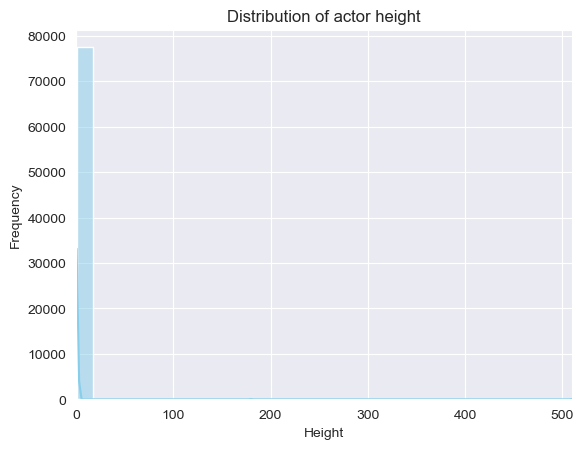

In [25]:
# Distribution of actor_height
sns.histplot(mov_char_data['Actor_height'], color='skyblue', kde=True, bins=30)
plt.xlim(0, mov_char_data['Actor_height'].max())
plt.title('Distribution of actor height')
plt.xlabel('Height')
plt.ylabel('Frequency')



In [26]:
# Dealing with height outliers: 
print( "max value:", mov_char_data['Actor_height'].max())
#how many lines have 510 height
print("number of lines have the max value: ", mov_char_data[mov_char_data['Actor_height'] == 510].shape[0])

# Actor_name of all the actor with the max height
print("Actor name with max values: ", mov_char_data[mov_char_data['Actor_height'] == 510]['Actor_name'])

# Replace the height of 510feet by 1.78m
mov_char_data['Actor_height'] = mov_char_data['Actor_height'].replace(510, 1.78)

# Check if the value has been replaced
print(mov_char_data[mov_char_data['Actor_height'] == 510].shape[0])


max value: 510.0
number of lines have the max value:  4
Actor name with max values:  5483      BENEDICT SMITH
22890      VINCE CORAZZA
83845      VINCE CORAZZA
154353     VINCE CORAZZA
Name: Actor_name, dtype: object
0


In [27]:
# Checking the new max value
print(mov_char_data['Actor_height'].max()) # 180
# Number of lines with 180 height
print("Number of lines with 180 height: ", mov_char_data[mov_char_data['Actor_height'] == 180].shape[0])
# Replace 180 by 1.80
mov_char_data['Actor_height'] = mov_char_data['Actor_height'].replace(180, 1.80)
# Check if the value has been replaced
print("Number of lines containing 180 now : ", mov_char_data[mov_char_data['Actor_height'] == 180].shape[0])



180.0
Number of lines with 180 height:  4
Number of lines containing 180 now :  0


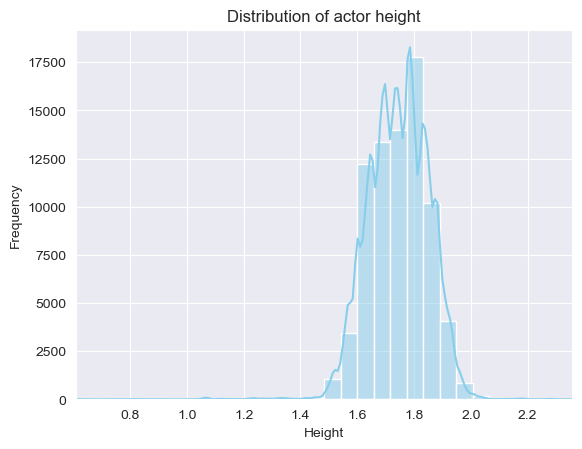

In [28]:
# Visualize the distribution of actor height
# adapting the min and max values of the x-axis
sns.histplot(mov_char_data['Actor_height'], color='skyblue', kde=True, bins=30)
plt.xlim(mov_char_data['Actor_height'].min(), mov_char_data['Actor_height'].max())
plt.title('Distribution of actor height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()


In [29]:
# print the different values of actor height
print(mov_char_data['Actor_height'].unique())

#min value
print("min value:", mov_char_data['Actor_height'].min())


# what are the lines of the min value
print("number of lines have the min value: ", mov_char_data[mov_char_data['Actor_height'] == 0.61].shape[0])
#print actor name of the min value
print("Actor name with min values: ", mov_char_data[mov_char_data['Actor_height'] == 0.61]['Actor_name'])


[    nan 1.85    1.63    1.78    1.727   1.82    1.7     1.57    1.77
 1.71    1.753   1.854   1.83    1.55    1.67    1.84    1.73    1.626
 1.62    1.791   1.93    1.68    1.797   1.918   1.75    1.829   1.6
 1.72    1.61    1.65    1.87    1.79    1.676   1.89    1.892   1.651
 1.88    1.98    1.8     1.9     1.778   1.8796  1.52    1.74    1.76
 1.734   1.97    1.803   1.645   1.66    1.638   2.01    1.943   1.702
 1.689   2.2     1.91    1.765   1.59    1.69    1.95    1.96    1.92
 1.905   1.8034  1.848   1.64    1.956   1.715   1.784   1.86    1.695
 1.842   1.873   1.6002  1.85928 1.664   1.632   2.16    1.58    1.94
 1.5     1.81    1.51    1.867   1.56    1.7018  1.575   1.4986  1.683
 1.549   1.42    1.759   2.038   1.7272  1.746   1.499   1.45    1.6256
 2.18    1.816   1.613   1.7145  1.708   2.007   1.067   1.594   1.721
 1.47    1.524   1.54    1.23    1.772   1.7526  1.8669  1.588   1.6764
 1.49    1.5494  1.981   1.24    1.7546  1.346   1.898   1.53    1.29
 1.9812  1.

The first visualization showed 2 outliers, actors with height of 5m10:  Benedict Smith and Vince Corrazza. Checking on the web their height, we saw that is was a mistakes. We replace the 2 outliers by their real height : 1,78 m. A similar problem with 180cm instead of 1.80m for some actors. For the min values, they usually correspond to babies height.

In [30]:
check_normality(mov_char_data['Actor_height'])
check_skewness(mov_char_data['Actor_height'])

Anderson-Darling Test Results:
  Statistic: 152.668
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]
  Conclusion: Data does not look Gaussian (reject H0)
The skewness score is: -0.42661149539041215 :
the distribution is left skewed


#### Information about the Revenue 

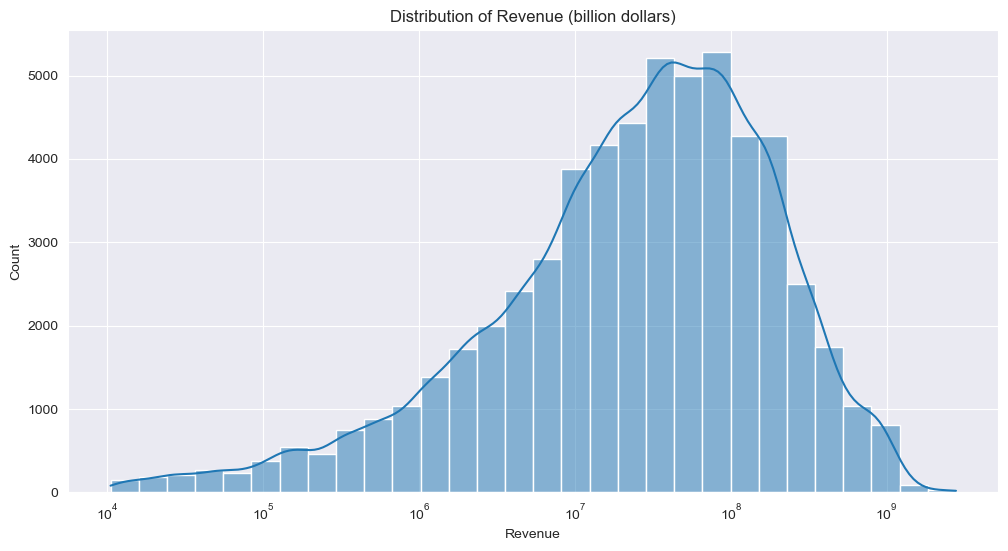

In [31]:
# Distribution of Revenue in the dataset
plt.figure(figsize=(12, 6))
sns.histplot(mov_char_data['Revenue'], bins=30, kde=True, log_scale=True)
plt.title("Distribution of Revenue (billion dollars)")
plt.show()

This histogram plot show the distribution of Actor age at the time of the movie release and Revenue of the movies. Log scale is used to better visualize the distribution of the data. The distribution of Revenue is right-skewed, meaning that most of the revenue values are concentrated on the lower end, with a long tail extending towards the higher revenue values.  


In [32]:
check_normality(mov_char_data['Revenue'])
check_skewness(mov_char_data['Revenue'])

Anderson-Darling Test Results:
  Statistic: 7877.631
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]
  Conclusion: Data does not look Gaussian (reject H0)
The skewness score is: 4.438157456041921 :
the distribution is right skewed


####  Visualizing the top 50 movies with biggest Revenue


/var/folders/tf/qf52qbk97_j455ycph6p51j80000gn/T/ipykernel_37355/924885043.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_50_movies.values, y=top_50_movies.index, palette='viridis')


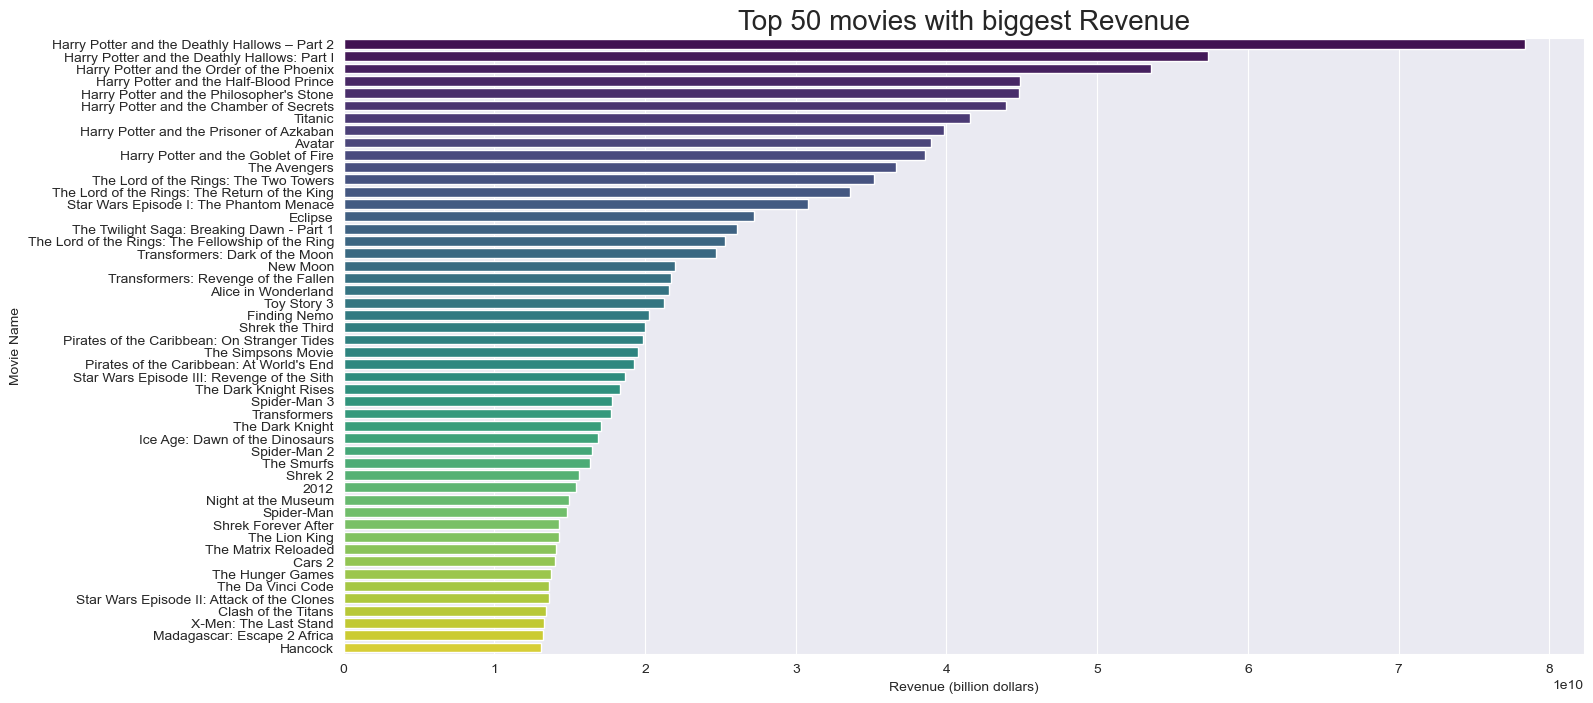

In [33]:
# Group by the Movie name 
top_50_movies = mov_char_data.groupby('Movie_name')['Revenue'].sum().sort_values(ascending=False).head(50)

plt.figure(figsize=(16, 8))
sns.barplot(x=top_50_movies.values, y=top_50_movies.index, palette='viridis')
plt.xlabel('Revenue (billion dollars)')
plt.ylabel('Movie Name')
plt.title('Top 50 movies with biggest Revenue', fontsize=20)
plt.show()



#### Information about Release_date

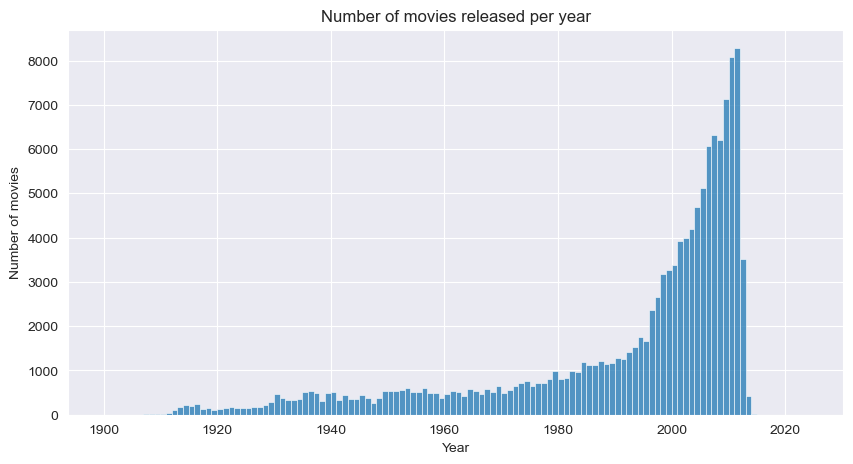

In [34]:
# Visualizing the Release_date column information with sns with the number of movies on the top of each bar
plt.figure(figsize=(10, 5))
sns.histplot(mov_char_data['Release_date'].dt.year.dropna(), bins=range(1900, 2025, 1), kde=False)
plt.title('Number of movies released per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()


#### Information about countries

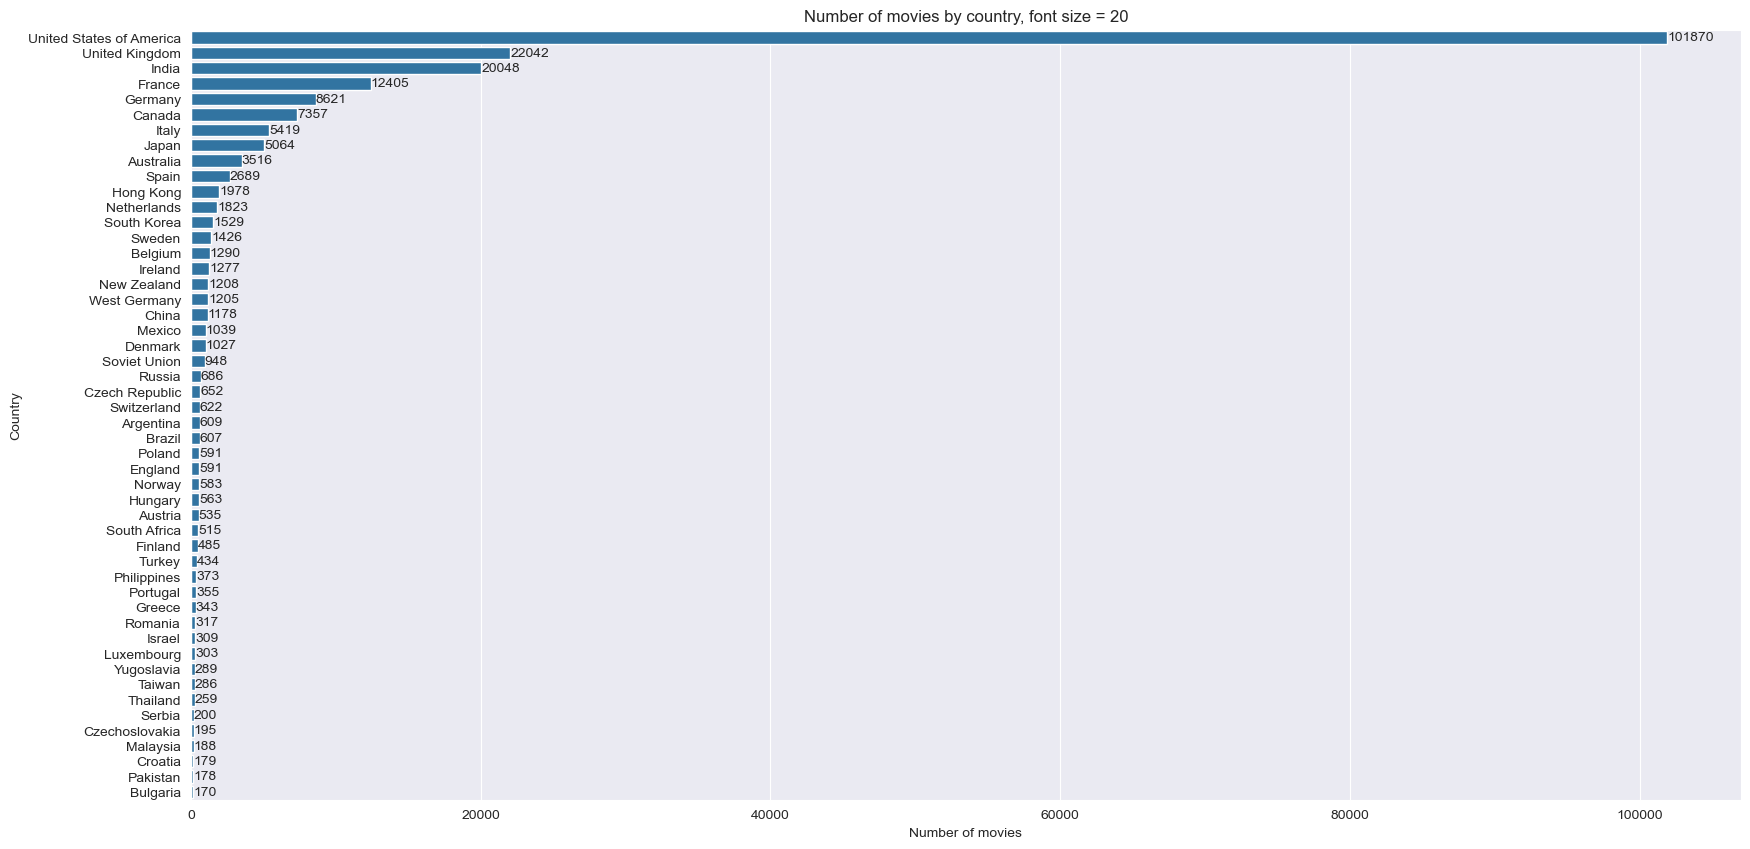

In [35]:
# grouping the movies by country
movies_by_country = mov_char_data['Countries'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Country')
movies_by_country = movies_by_country[movies_by_country != ''].value_counts()

plt.figure(figsize=(20, 10))
sns.barplot(x=movies_by_country.head(50), y=movies_by_country.head(50).index)

for i, val in enumerate(movies_by_country.head(50)):
    plt.text(val, i, val, ha='left', va='center')

plt.title('Number of movies by country, font size = 20')
plt.xlabel('Number of movies')
plt.ylabel('Country')
plt.show()


It is obvious that the initial dataset is centered on occidental world, aside from the presence of indian movies. Fortunately it coincides with the fact that it is harder for us to find baby names data from non-occidental countries.

#### Information about language

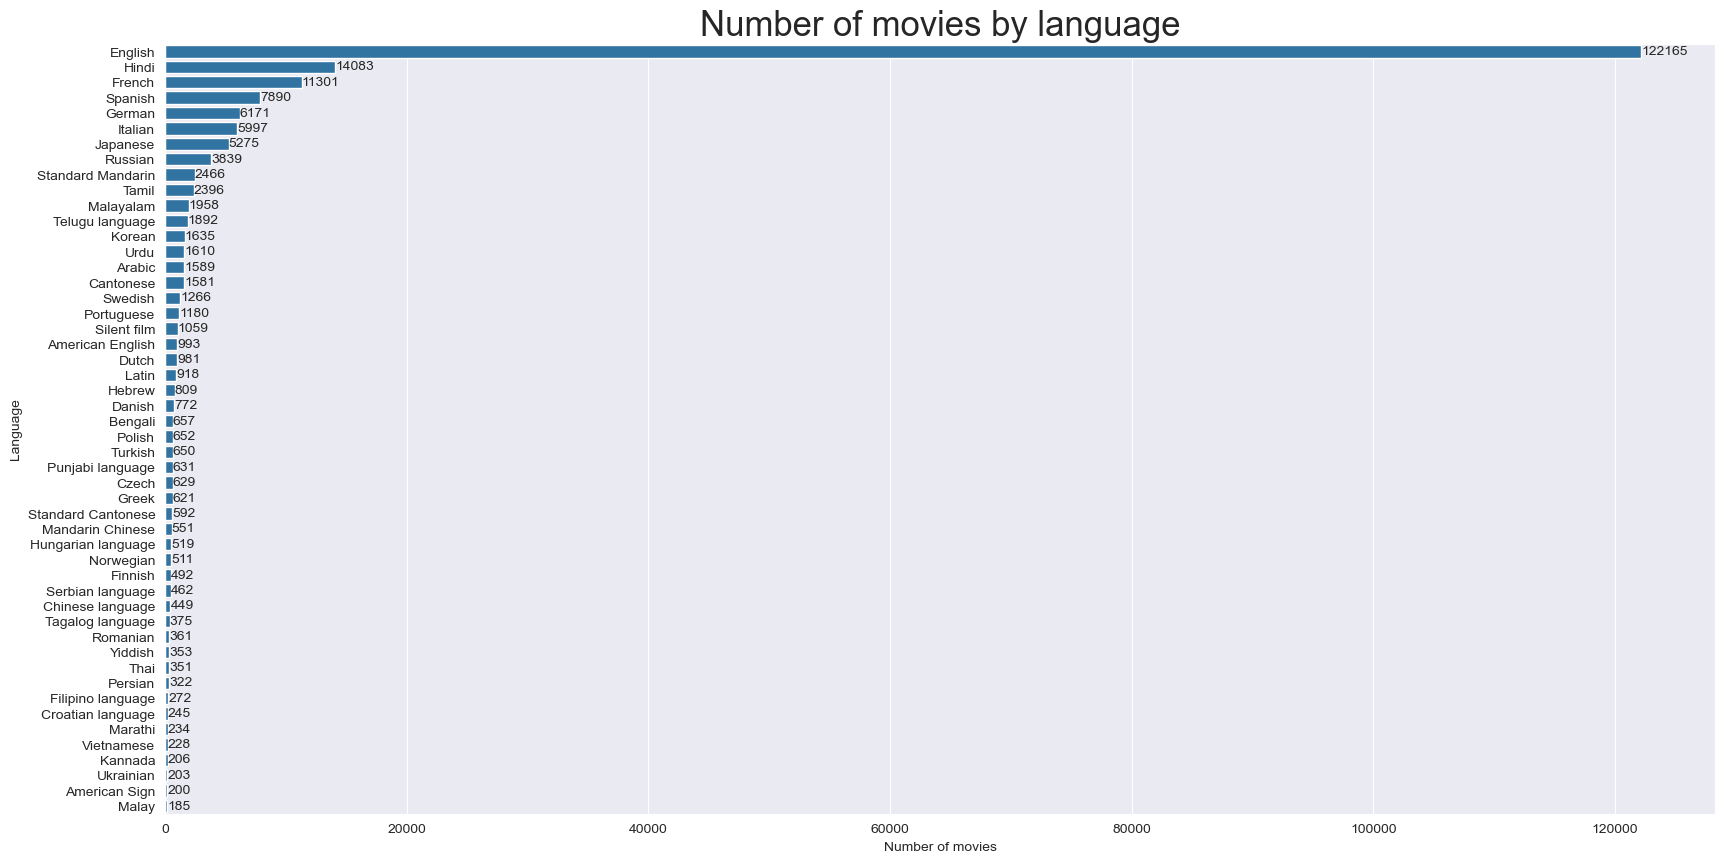

In [36]:
# grouping the movies by language
movies_by_language = mov_char_data['Languages'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Languages')
movies_by_language = movies_by_language[movies_by_language != ''].value_counts()


plt.figure(figsize=(20, 10))
sns.barplot(x=movies_by_language.head(50), y=movies_by_language.head(50).index)

for i, val in enumerate(movies_by_language.head(50)):
    plt.text(val, i, val, ha='left', va='center')

plt.title('Number of movies by language', fontsize=25)
plt.xlabel('Number of movies')
plt.ylabel('Language')
plt.show()



#### Information about movies genre

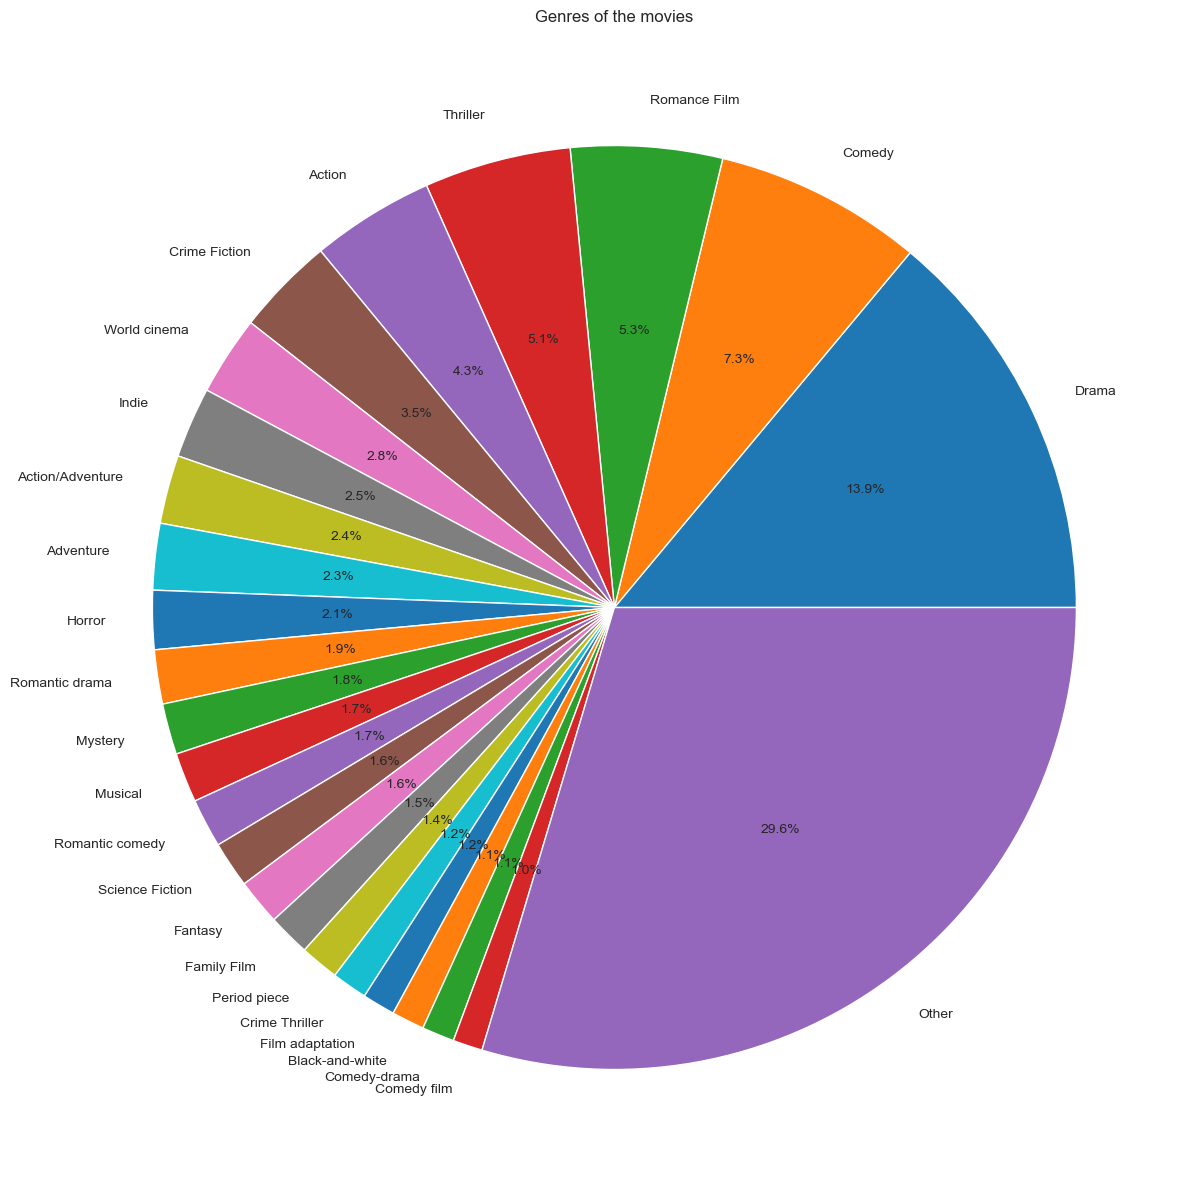

In [37]:
# Visualizing the genres of the movies with a pie chart (under 1% grouped as 'Other')


# Grouping the movies by genre and counting the number of movies in each genre
movies_by_genre = mov_char_data['Genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')
movies_by_genre = movies_by_genre[movies_by_genre != ''].value_counts()

# Grouping the genres with less than 1% of the total number of movies as 'Other'
threshold = 0.01
total_movies = movies_by_genre.sum()
movies_by_genre = movies_by_genre[movies_by_genre / total_movies > threshold]
movies_by_genre['Other'] = total_movies - movies_by_genre.sum()



# Visualizing the genres of the movies with a pie chart
# adapt the size of the % on the pie chart to 1 decimal

plt.figure(figsize=(15, 15))
plt.pie(movies_by_genre, labels=movies_by_genre.index, autopct='%1.1f%%') 

plt.title('Genres of the movies')
plt.show()



#### Information about the actor gender

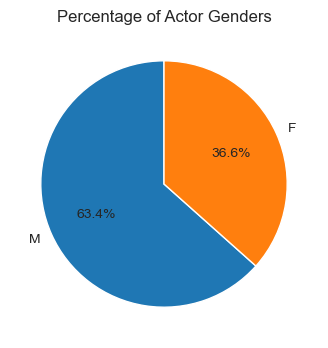

In [38]:
# Isolting the genders columns
new_df = mov_char_data[['Actor_gender', 'Actor_name']]
new_df.head()


gender_counts = new_df['Actor_gender'].value_counts()

# Calculate percentages
gender_percentages = gender_counts / gender_counts.sum() * 100

# Plotting the percentages using a pie chart
plt.figure(figsize=(4, 4))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Actor Genders')
plt.show()


### Correlation matrix 

In [39]:
def encode_categorical_features(df):
    # Identify categorical features
    categorical_features = df.select_dtypes(include=['object', 'category']).columns
    
    # Initialize a LabelEncoder
    le = LabelEncoder()
    
    # Apply label encoding to each categorical feature
    for feature in categorical_features:
        df[feature] = le.fit_transform(df[feature].astype(str))
    
    return df

def plot_correlation_matrix(df):
    # Encode categorical features
    df_encoded = encode_categorical_features(df.copy())
    
    # Calculate the correlation matrix, automatically excluding NaN values
    corr_matrix = df_encoded.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
    plt.title('Correlation Matrix')
    plt.show()

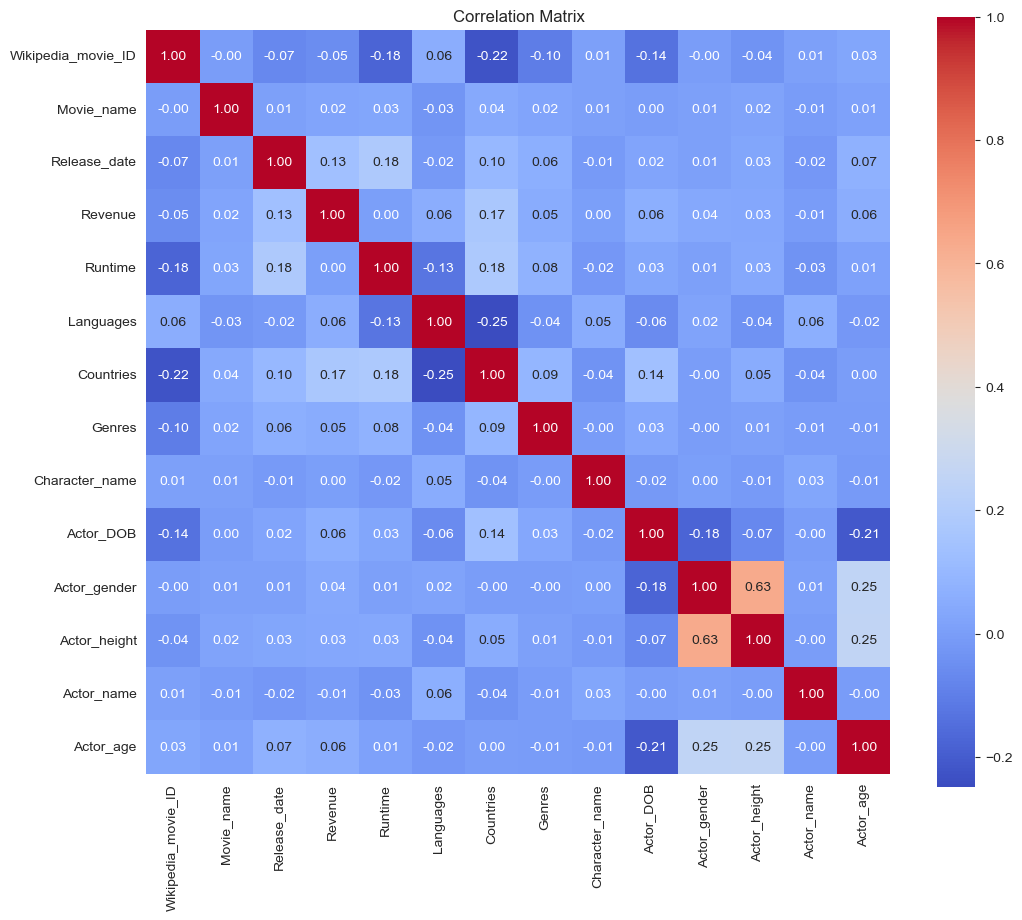

In [40]:
plot_correlation_matrix(mov_char_data)

We observe some very slight relationships within the movie and character dataset: a moderate positive correlation between 'Runtime' and 'Revenue' suggests that longer movies tend to generate more revenue. Conversely, a negative correlation between 'Languages' and 'Countries' indicates that films with more languages are produced in fewer countries, highlighting trends in film production and distribution.

## Trend evaluation
To assess what impact a movie had on child naming, we first try a simple model that computes the average count of babies named like a character 5 years before and 5 years after the movie's release, and compute their difference. The higher it is, the higher the trend the year the film was released.

Here is a demo of the model printing the top10 trend-inducing character names

In [41]:
from src.models.trend_evaluation import trend_eval_ranking
from src.models.imdb_manipulation import get_movie_votes, merge_with_characters

# Get the IMDB votes for the movies (Warning : might take a few minutes, nearly 700K rows !)
imdb_titles = get_movie_votes("data/imdb")
# Merge the movies and characters data with the IMDB votes
char_rating = merge_with_characters(imdb_titles, mov_char_data)


There are 699357 movies in the imdb dataset.
There are 308135 rows in the merged dataset


In [42]:
# Ranking top 10 influencing character names by trend increase
ranking = trend_eval_ranking(global_names.clean_df, char_rating)
print(ranking[["Character_name","movie_name","release_year"]].head(10))

     Character_name                       movie_name  release_year
986            MARK                Dial M for Murder        1954.0
1040        MICHAEL                        Peter Pan        1953.0
1501          TYLER                      Point Break        1991.0
478            EMMA                     The Avengers        1998.0
635          HANNAH                        Toy Story        1995.0
1421          SUSAN                     Citizen Kane        1941.0
898            LISA                      Rear Window        1954.0
775        JONATHAN                         Superman        1978.0
1010        MATTHEW                      Taxi Driver        1976.0
842            KYLE  Star Trek II: The Wrath of Khan        1982.0


### Trend visualisation
Using the previously computed trend-inducing movies, we can now plot the baby name popularity over time with a red line on the year of the most influential movie for this name.

Note that we need to indicate the name in uppercase for compatibility with name datasets and add the gender M/F to avoid confusion for androgenous names.

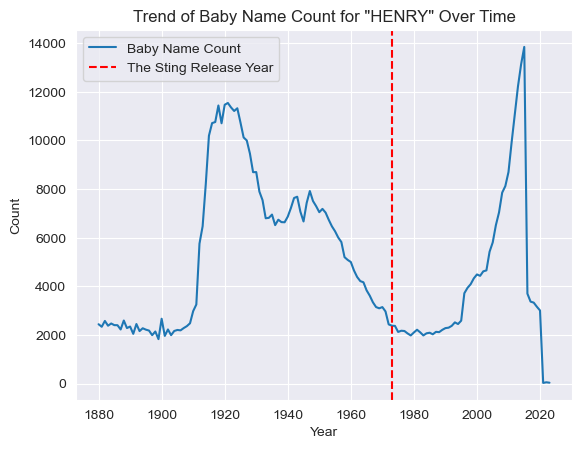

In [43]:
from src.models.trend_evaluation import plot_trend

plot_trend("HENRY", "M", ranking, global_names.clean_df)

## Name prediction

To answer our research questions, we needed to find a method to determine if after a specific date, the count of name would follow an abnormal evolution.

There are multiple ways to do it and for our first tentative, we decided to try interrupted time series.

### ITS - Interrupted time series
The concept is rather simple: at a specific point in time, we split our measurements in two parts and use the first one to train a model. This model will try to predict what the evolution would have been based on the previous behaviour and once we get it, we can compare it with the second part of the data that we kept. 

As mentioned in the explanation, we need to chose a model for this and after some researches, we decided to try the two following ones.

We are still evaluating how well they are suited for our project, since the training sample is quite limited due to the granularity of the data. (Count is by year)

#### SARIMA - Seasonal Autoregressive Integrated Moving Average
Well known model for univariate time series forecasting, SARIMA is an extension of the ARIMA model and adds the support for time series with a seasonal behaviour in addition to the trend support of ARIMA. 

Importing plotly failed. Interactive plots will not work.


UK & France & US : Data is clean and conforms to the expected structure !


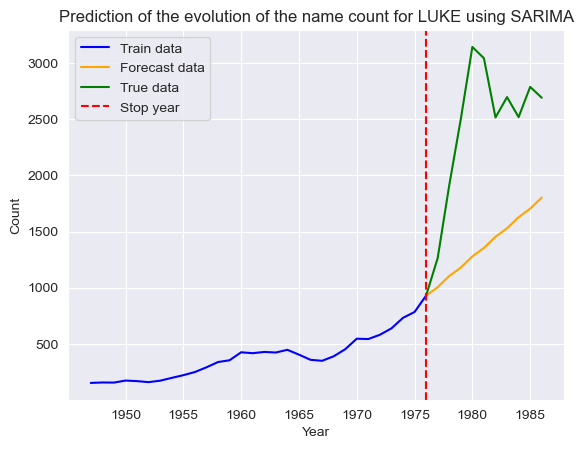

In [44]:
from src.models.naming_prediction import predict_naming_ARIMA

prediction_ARIMA = predict_naming_ARIMA(global_names, "LUKE", 1976, 10, True)

In [45]:
prediction_ARIMA

,Year,Predicted Count,True Count
0,1977,1003.741573,1263
1,1978,1103.660970,1912
2,1979,1178.719522,2502
3,1980,1278.325930,3145
4,1981,1353.693530,3044
5,1982,1452.994782,2516
6,1983,1528.663697,2698
7,1984,1627.667426,2519
8,1985,1703.630118,2789
9,1986,1802.343770,2692


Here we asked our SARIMA model to forecast the counts for the name "Luke" from the year after the year 1976, which is when the first Star Wars movie was released. 

We can see that the the modelled curve has a slower growth than the actual one and this can be used to show an abnormal evolution of the count.

#### Prophet
Developped by Facebook, Prophet is a fully automatic procedure made for time series forecasting that is used in various context due it's wide range of features (seasonality, holidy effect, ...)   

UK & France & US : Data is clean and conforms to the expected structure !


20:10:35 - cmdstanpy - INFO - Chain [1] start processing


     Year  Count
96   1976    929
97   1977   1263
98   1978   1912
99   1979   2502
100  1980   3145
101  1981   3044
102  1982   2516
103  1983   2698
104  1984   2519
105  1985   2789
106  1986   2692


20:10:36 - cmdstanpy - INFO - Chain [1] done processing


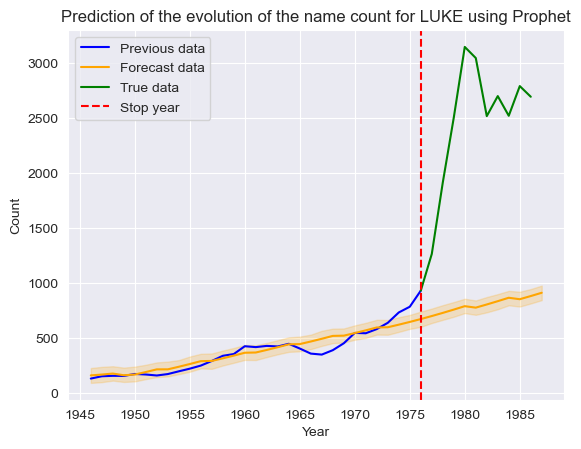

In [46]:
from src.models.naming_prediction import predict_naming_prophet

prediction_PROPHET = predict_naming_prophet(global_names, "LUKE", 1976, 10, True)

In [47]:
prediction_PROPHET


,Year,Predicted Count,yhat_lower,yhat_upper,True Count
98,1977,727.010391,663.764533,797.464024,1263
99,1978,756.938124,691.952689,825.721682,1912
100,1979,788.098503,725.078228,855.710364,2502
101,1980,774.875908,709.394474,840.115363,3145
102,1981,803.547988,732.012876,871.016764,3044
103,1982,833.475722,760.223652,897.814080,2516
104,1983,864.636101,795.956946,927.520440,2698
105,1984,851.413505,784.677949,919.236674,2519
106,1985,880.085585,812.749769,943.836613,2789
107,1986,910.013319,843.084258,975.258162,2692


This time, we use Facebook's Prophet to forecast the counts for the same parameters and we can already see a difference between the two models. Prophet is generally more resistant to outliers and here, this leads to a more important difference between the modelled data and the actual one.

For now, those are only observations and we'll be investigated more thoroughly in the following days

#### Model conclusion
We still need to compare the two models and see if the ITS approach would be beneficial for our project since other options are available.

In [48]:
def compute_distance_abs(df_pred):
    distance_pred = df_pred[['Year', 'Predicted Count', 'True Count']].copy()
    distance_pred['Distance'] = abs(distance_pred['Predicted Count'] - distance_pred['True Count'])
    return distance_pred

In [107]:
def compute_distance(df_pred):
    """
    Computes the distance between the true count and the predicted count for each year.
    If the predicted count is higher than the true count, -inf is returned. Otherwise, the absolute difference is returned.

    :param df_pred: DataFrame containing the columns 'Year', 'Predicted Count', and 'True Count'
    :return: DataFrame with an additional 'Distance' column representing the computed distance
    """
    distance_pred = df_pred[['Year', 'Predicted Count', 'True Count']].copy()
    
    distance_pred['Distance'] = np.where(distance_pred['Predicted Count'] > distance_pred['True Count'], -abs(distance_pred['Predicted Count'] - distance_pred['True Count']), abs(distance_pred['Predicted Count'] - distance_pred['True Count']))

    #distance_pred['Distance'] = np.where(distance_pred['Predicted Count'] > distance_pred['True Count'], -np.inf, abs(distance_pred['Predicted Count'] - distance_pred['True Count']))
    return distance_pred

In [50]:
def compute_area(distance_df):
    # Use the trapezoidal rule to compute the area under the curve
    area = np.trapz(distance_df['Distance'], x=distance_df['Year'])
    return area

In [75]:
def plot_distance(distance_df, label1='Distance 1', distance_df2=None, label2='Distance 2'):
    plt.figure(figsize=(16, 8))
    sns.lineplot(x='Year', y='Distance', data=distance_df, label=label1)
    if distance_df2 is not None:
        sns.lineplot(x='Year', y='Distance', data=distance_df2, label=label2)
    plt.title('Difference between true count and model predictions')
    plt.xlabel('Year')
    plt.ylabel('Count Difference')
    plt.legend()
    plt.show()

In [52]:
def plot_values(merged_predictions):
    plt.figure(figsize=(16, 8))
    sns.lineplot(x='Year', y='Predicted Count_sarima', data=merged_predictions, label='SARIMA')
    sns.lineplot(x='Year', y='Predicted Count_prophet', data=merged_predictions, label='Prophet')
    sns.lineplot(x='Year', y='True Count', data=merged_predictions, label='True Count')
    plt.title('model comparison')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

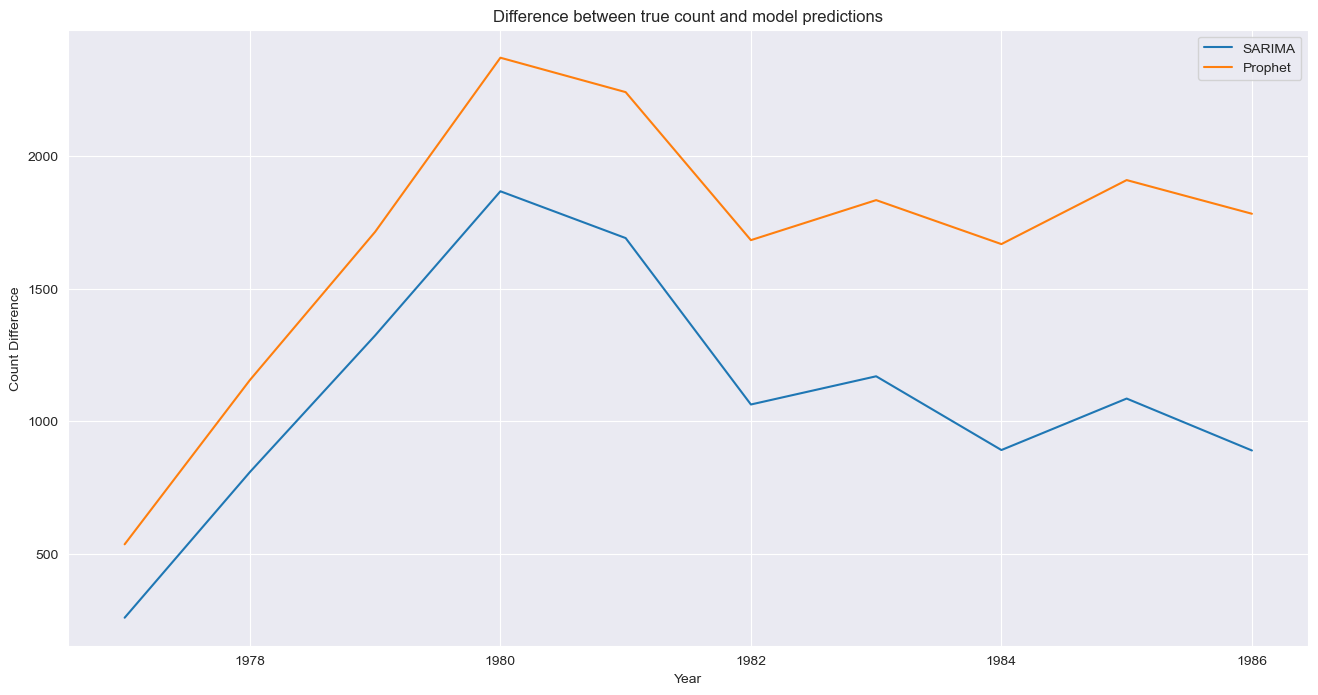

In [76]:
df_distance_PROPHET = compute_distance(prediction_PROPHET)
df_distance_SARIMA = compute_distance(prediction_ARIMA)

plot_distance(df_distance_SARIMA, label1='SARIMA', distance_df2=df_distance_PROPHET, label2='Prophet')

In [63]:
area_prophet = compute_area(df_distance_PROPHET)
area_sarima = compute_area(df_distance_SARIMA)

print(f"Area under the curve for SARIMA: {area_sarima}")
print(f"Area under the curve for Prophet: {area_prophet}")

Area under the curve for SARIMA: 10472.10135316392
Area under the curve for Prophet: 15730.916708631035


# Détermination du threshold

Cette fonction va permettre de trouver un threshold pour notre metric qui vise à dire si oui ou non un film a eu un impact sur le nombre de naissances d'un prénom.

In [109]:
def investigate_predictions(data: NamesData, name: str, stop_year: int, nb_years: int, plot=False) -> pd.DataFrame:
    """
    Computes Prophet and SARIMA predictions, computes the distance and corresponding area regarding true counts,
    and displays both predictions, distances, and areas.

    :param data: the name dataset
    :param name: the name from which we predict the evolution
    :param stop_year: the year of the event, we will predict the evolution from stop_year + 1
    :param nb_years: the number of years we want to predict
    :param plot: if True, displays diagnostic plots
    :return: a dataframe with the predictions and distances for both models
    """
    # Compute predictions using Prophet
    df_prophet = predict_naming_prophet(data, name, stop_year, nb_years, plot)
    df_prophet_distance = compute_distance(df_prophet)
    area_prophet = compute_area(df_prophet_distance)

    # Compute predictions using SARIMA
    df_sarima = predict_naming_ARIMA(data, name, stop_year, nb_years, plot)
    df_sarima_distance = compute_distance(df_sarima)
    area_sarima = compute_area(df_sarima_distance)

    # Print the areas
    print(f"Area under the curve for Prophet: {area_prophet}")
    print(f"Area under the curve for SARIMA: {area_sarima}")

    # Plot the distances
    plot_distance(df_prophet_distance, label1='Prophet Distance', distance_df2=df_sarima_distance, label2='SARIMA Distance')

    #Merge both dataframes on following columns : Year, True Count
    df_combined = df_prophet_distance.merge(df_sarima_distance, on=['Year', 'True Count'], suffixes=('_prophet', '_sarima'))
    
    return df_combined

## Neo - Matrix (1999)

In [110]:
neo_df = investigate_predictions(global_names, "NEO", 1998, 10, plot=True)

UK & France & US : Data is clean and conforms to the expected structure !
    Year  Count
1   1999     24
2   2000    167
3   2001    178
4   2002    166
5   2003    296
6   2004    359
7   2005    250
8   2006    322
9   2007    266
10  2008    246


ValueError: Dataframe has less than 2 non-NaN rows.

## Mia - Pulp Fiction (1994)

UK & France & US : Data is clean and conforms to the expected structure !


21:07:15 - cmdstanpy - INFO - Chain [1] start processing
21:07:15 - cmdstanpy - INFO - Chain [1] done processing


    Year  Count
53  1993    801
54  1994    866
55  1995   1108
56  1996   2094
57  1997   3107
58  1998   3339
59  1999   3771
60  2000   4698
61  2001   6177
62  2002   8971
63  2003  10553


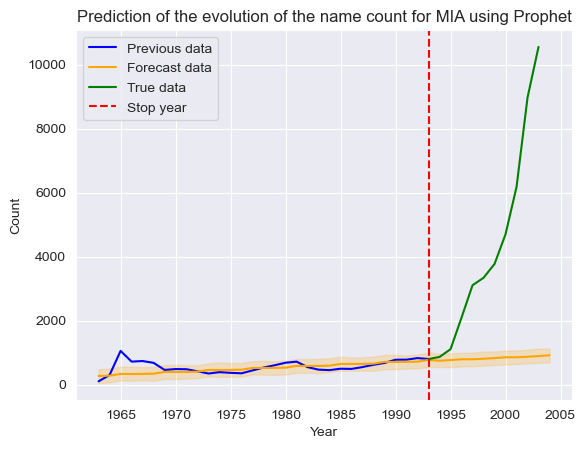

UK & France & US : Data is clean and conforms to the expected structure !


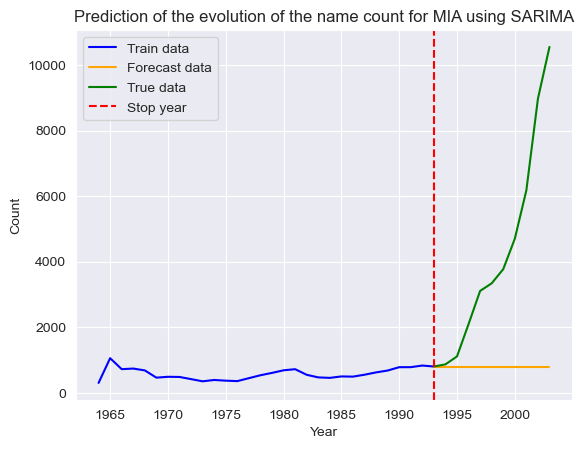

Area under the curve for Prophet: 31425.89804016591
Area under the curve for SARIMA: 31765.5


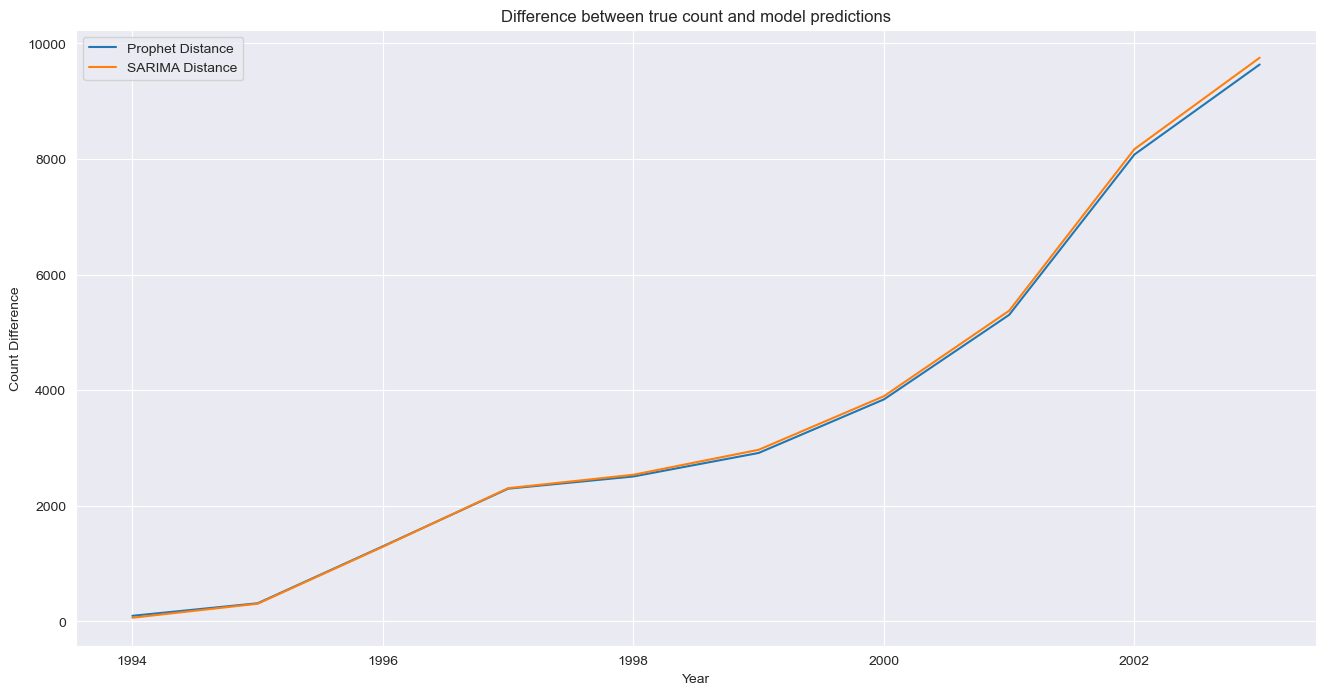

In [111]:
mia_df = investigate_predictions(global_names, "MIA", 1993, 10, plot=True)

## Truman - The Truman Show (1998)

UK & France & US : Data is clean and conforms to the expected structure !


21:07:26 - cmdstanpy - INFO - Chain [1] start processing
21:07:26 - cmdstanpy - INFO - Chain [1] done processing


     Year  Count
117  1997     95
118  1998    118
119  1999    118
120  2000    150
121  2001    130
122  2002    144
123  2003    161
124  2004    175
125  2005    167
126  2006    194
127  2007    202


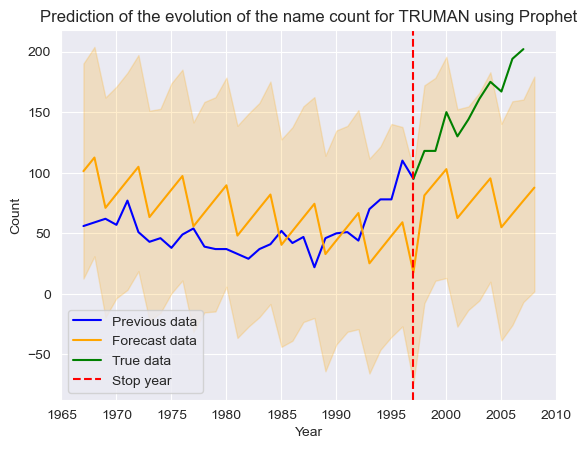

UK & France & US : Data is clean and conforms to the expected structure !


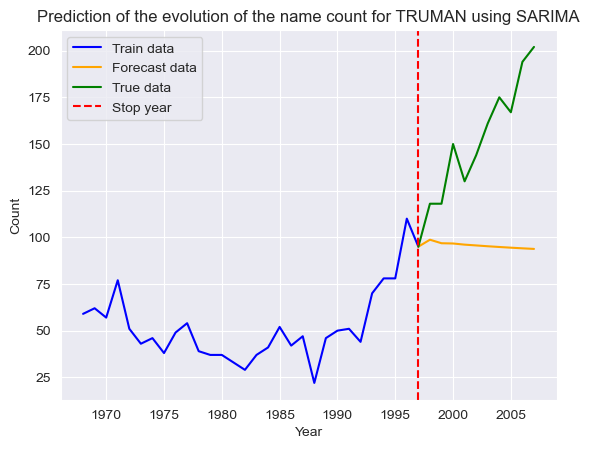

Area under the curve for Prophet: 691.977653793715
Area under the curve for SARIMA: 538.8921161269451


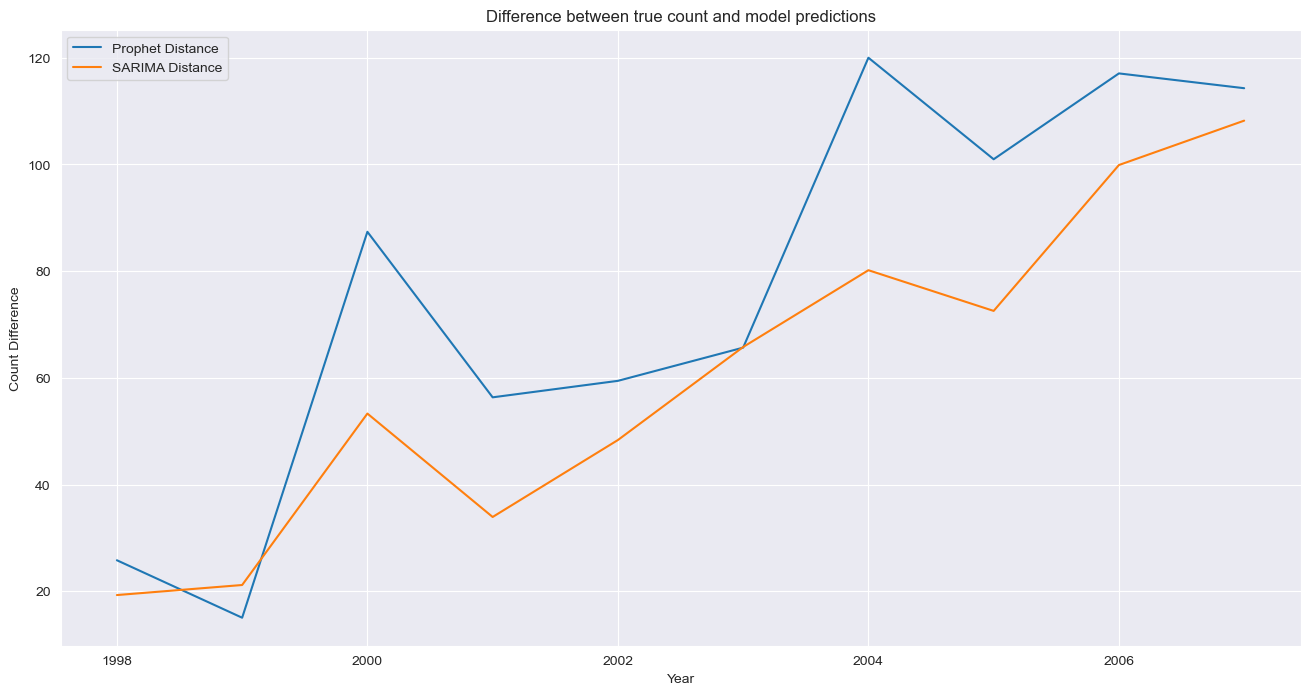

In [112]:
truman_df = investigate_predictions(global_names, "TRUMAN", 1997, 10, plot=True)

## Leon - Leon (1994)

UK & France & US : Data is clean and conforms to the expected structure !


21:07:37 - cmdstanpy - INFO - Chain [1] start processing
21:07:37 - cmdstanpy - INFO - Chain [1] done processing


     Year  Count
113  1993    566
114  1994    564
115  1995    540
116  1996   1025
117  1997   1088
118  1998   1182
119  1999   1224
120  2000   1306
121  2001   1484
122  2002   1486
123  2003   1591


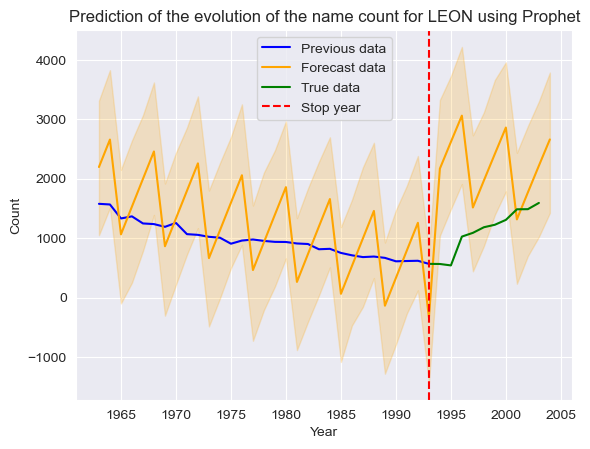

UK & France & US : Data is clean and conforms to the expected structure !


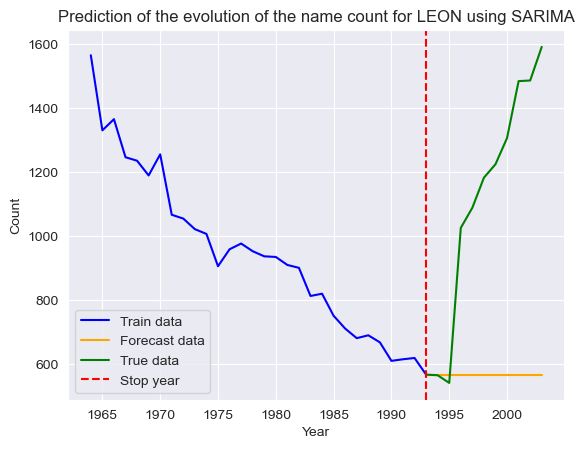

Area under the curve for Prophet: -9339.779759830704
Area under the curve for SARIMA: 5318.5


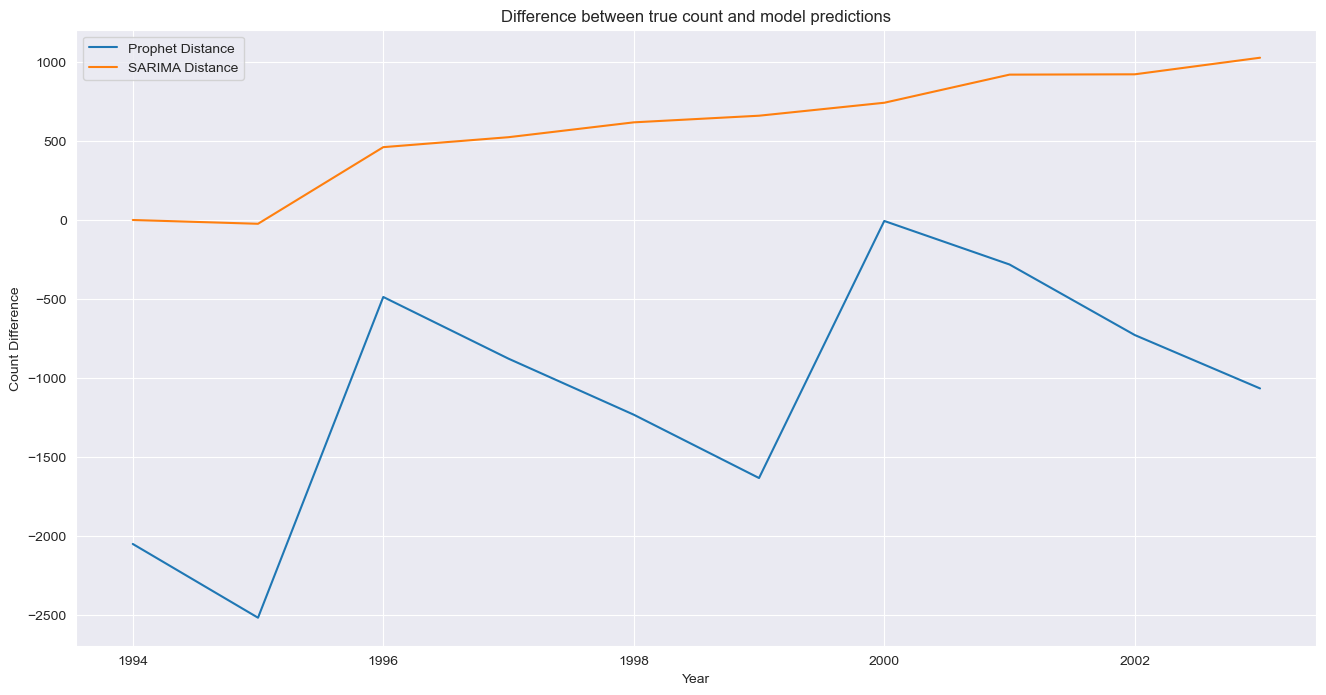

In [113]:
leon_df = investigate_predictions(global_names, "LEON", 1993, 10, plot=True)

In [114]:
leon_df

,Year,Predicted Count_prophet,True Count,Distance_prophet,Predicted Count_sarima,Distance_sarima
0,1994,2616.330401,564,-2052.330401,566.0,-2.0
1,1995,3059.211840,540,-2519.211840,566.0,-26.0
2,1996,1514.211094,1025,-489.211094,566.0,459.0
3,1997,1967.748700,1088,-879.748700,566.0,522.0
4,1998,2416.259626,1182,-1234.259626,566.0,616.0
5,1999,2859.141064,1224,-1635.141064,566.0,658.0
6,2000,1314.140318,1306,-8.140318,566.0,740.0
7,2001,1767.677924,1484,-283.677924,566.0,918.0
8,2002,2216.188850,1486,-730.188850,566.0,920.0
9,2003,2659.070288,1591,-1068.070288,566.0,1025.0


## Trinity - Matrix (1999)

UK & France & US : Data is clean and conforms to the expected structure !


21:07:49 - cmdstanpy - INFO - Chain [1] start processing


    Year  Count
36  1998    565
37  1999   1590
38  2000   4539
39  2001   4778
40  2002   4624
41  2003   5425
42  2004   5964
43  2005   5752
44  2006   5121
45  2007   4601
46  2008   4452


21:07:49 - cmdstanpy - INFO - Chain [1] done processing


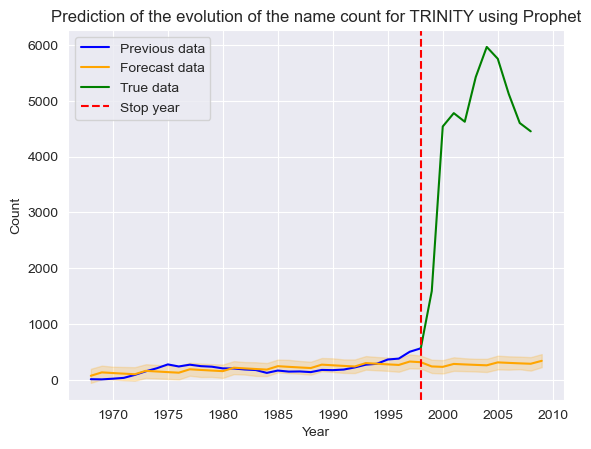

UK & France & US : Data is clean and conforms to the expected structure !


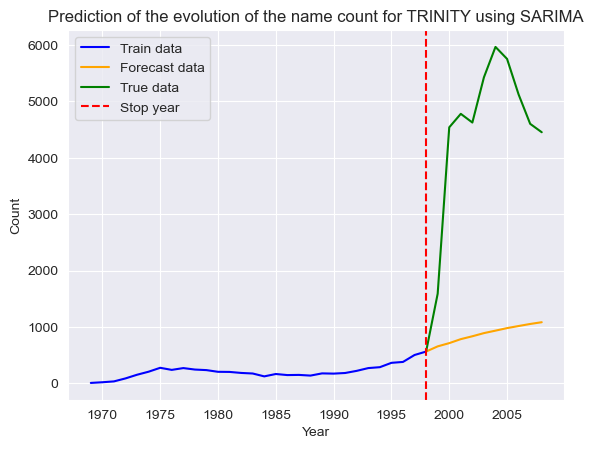

Area under the curve for Prophet: 41244.64860794451
Area under the curve for SARIMA: 35739.78747653773


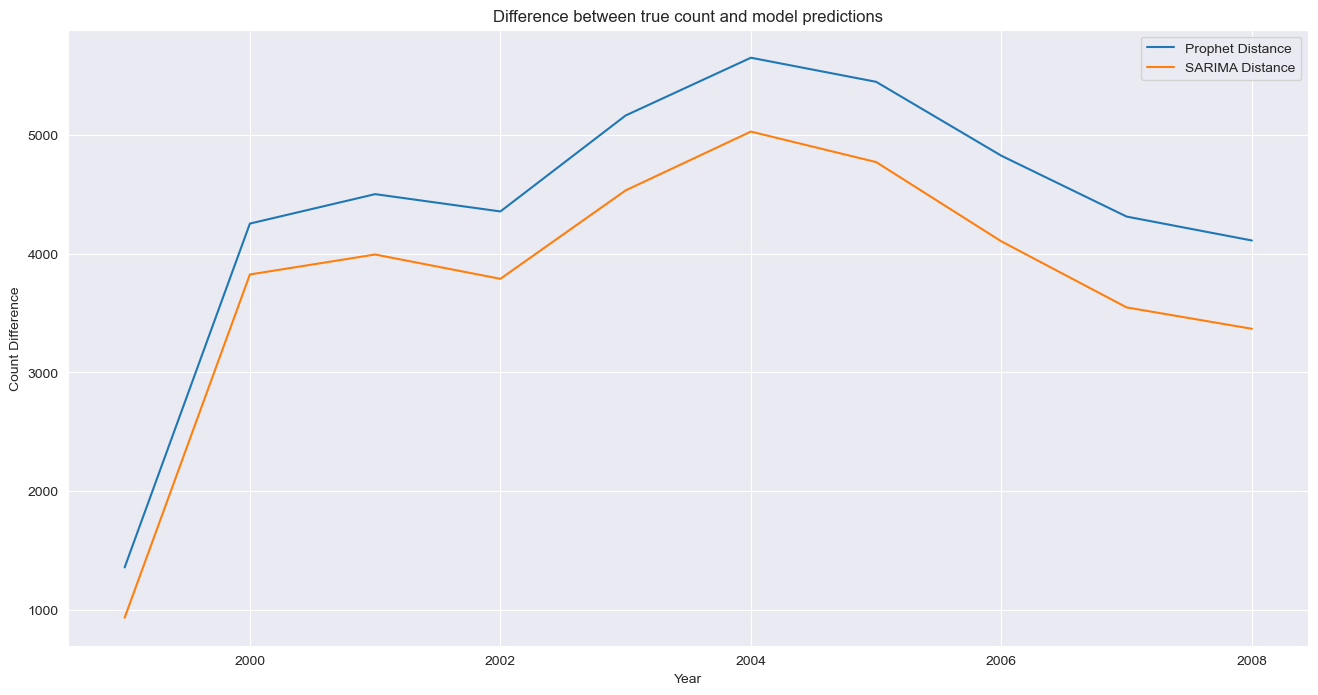

In [115]:
trinity_df = investigate_predictions(global_names, "TRINITY", 1998, 10, plot=True)

## Luke - Star Wars (1977)

UK & France & US : Data is clean and conforms to the expected structure !


21:08:01 - cmdstanpy - INFO - Chain [1] start processing


     Year  Count
96   1976    929
97   1977   1263
98   1978   1912
99   1979   2502
100  1980   3145
101  1981   3044
102  1982   2516
103  1983   2698
104  1984   2519
105  1985   2789
106  1986   2692


21:08:02 - cmdstanpy - INFO - Chain [1] done processing


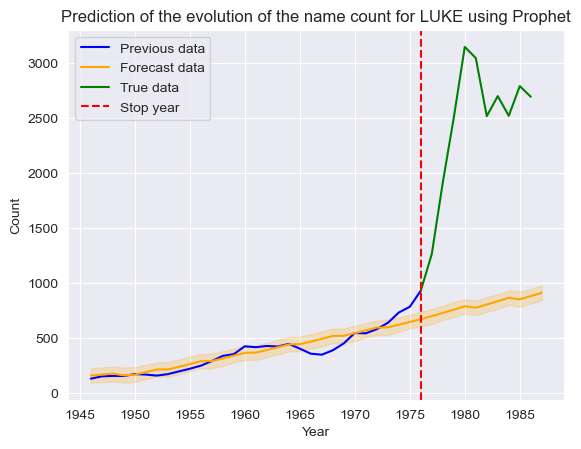

UK & France & US : Data is clean and conforms to the expected structure !


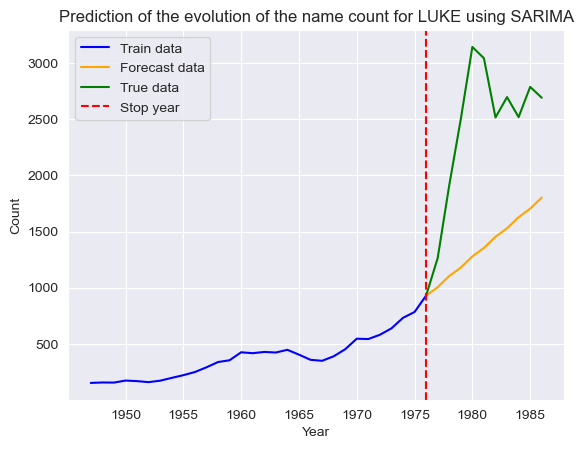

Area under the curve for Prophet: 15730.916708631035
Area under the curve for SARIMA: 10472.10135316392


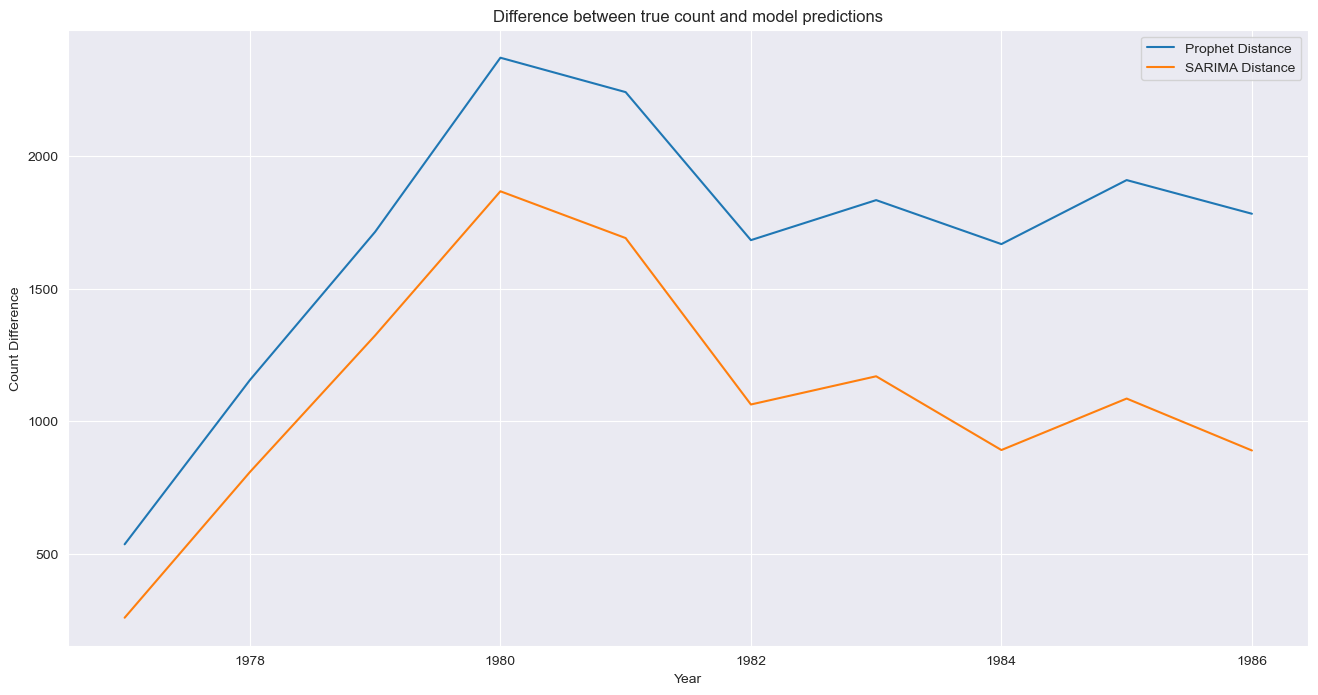

In [116]:
luke_df = investigate_predictions(global_names, "LUKE", 1976, 10, plot=True)

In [117]:
luke_df

,Year,Predicted Count_prophet,True Count,Distance_prophet,Predicted Count_sarima,Distance_sarima
0,1977,727.010391,1263,535.989609,1003.741573,259.258427
1,1978,756.938124,1912,1155.061876,1103.660970,808.339030
2,1979,788.098503,2502,1713.901497,1178.719522,1323.280478
3,1980,774.875908,3145,2370.124092,1278.325930,1866.674070
4,1981,803.547988,3044,2240.452012,1353.693530,1690.306470
5,1982,833.475722,2516,1682.524278,1452.994782,1063.005218
6,1983,864.636101,2698,1833.363899,1528.663697,1169.336303
7,1984,851.413505,2519,1667.586495,1627.667426,891.332574
8,1985,880.085585,2789,1908.914415,1703.630118,1085.369882
9,1986,910.013319,2692,1781.986681,1802.343770,889.656230


## Exemple de nom pas influencé par un film : Mary en 2000

UK & France & US : Data is clean and conforms to the expected structure !


21:10:45 - cmdstanpy - INFO - Chain [1] start processing
21:10:45 - cmdstanpy - INFO - Chain [1] done processing


     Year  Count
119  1999   6814
120  2000   6624
121  2001   6167
122  2002   5873
123  2003   5406
124  2004   5263
125  2005   4883
126  2006   4483
127  2007   4036
128  2008   3857
129  2009   3409


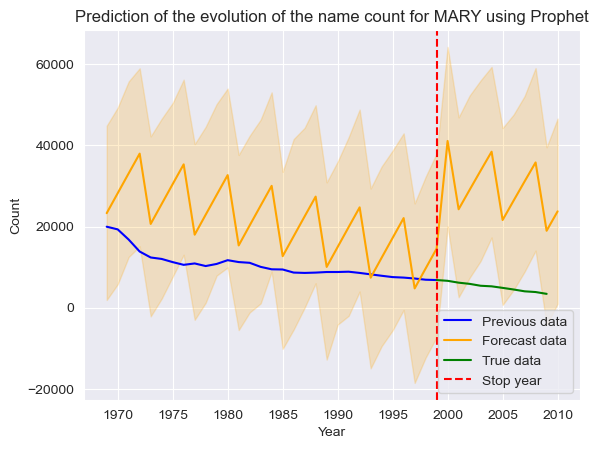

UK & France & US : Data is clean and conforms to the expected structure !


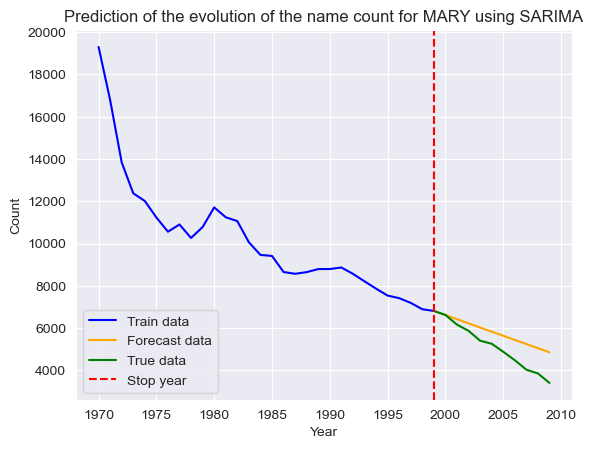

Area under the curve for Prophet: -214188.8946281653
Area under the curve for SARIMA: -6652.630472801077


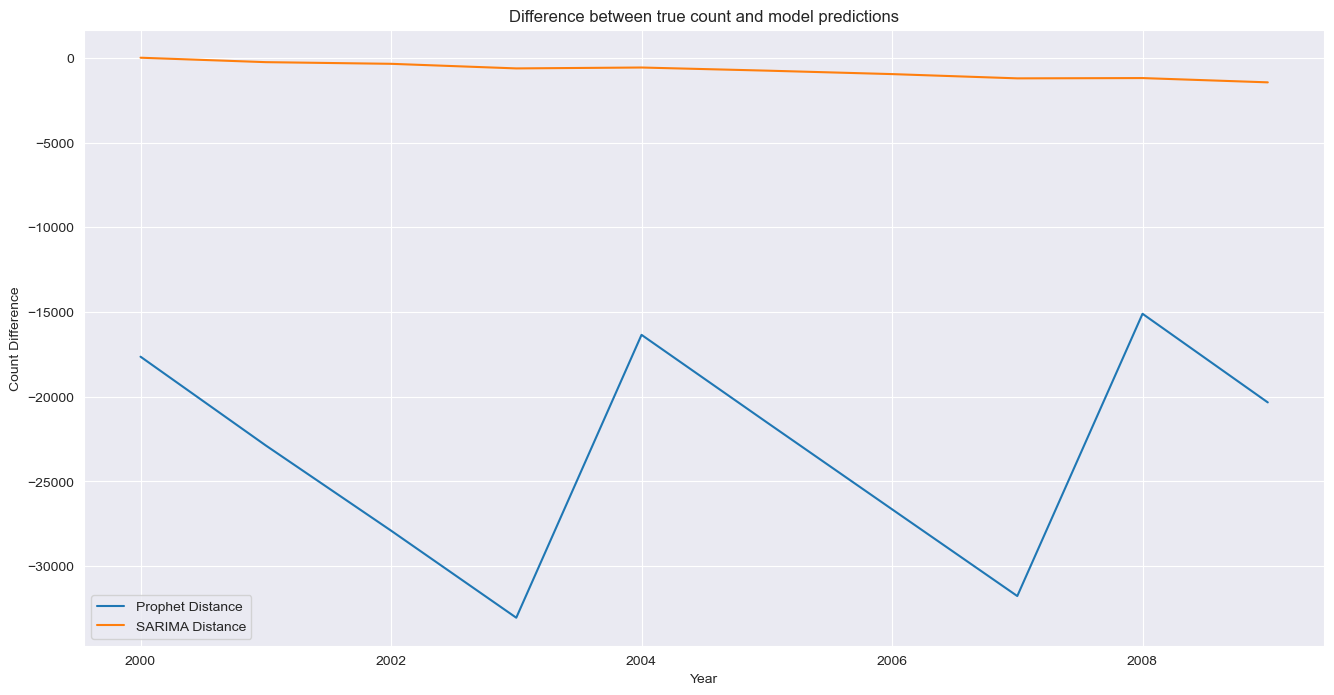

In [118]:
mary_df = investigate_predictions(global_names, "MARY", 1999, 10, plot=True)

## Julien - 1999

UK & France & US : Data is clean and conforms to the expected structure !


21:21:32 - cmdstanpy - INFO - Chain [1] start processing
21:21:32 - cmdstanpy - INFO - Chain [1] done processing


     Year  Count
101  1998   5907
102  1999   5377
103  2000   5219
104  2001   4699
105  2002   3911
106  2003   3460
107  2004   3102
108  2005   2799
109  2006   2635
110  2007   2388
111  2008   2083


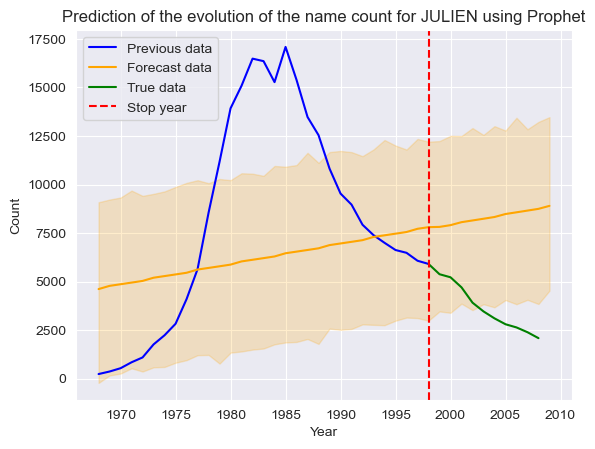

UK & France & US : Data is clean and conforms to the expected structure !


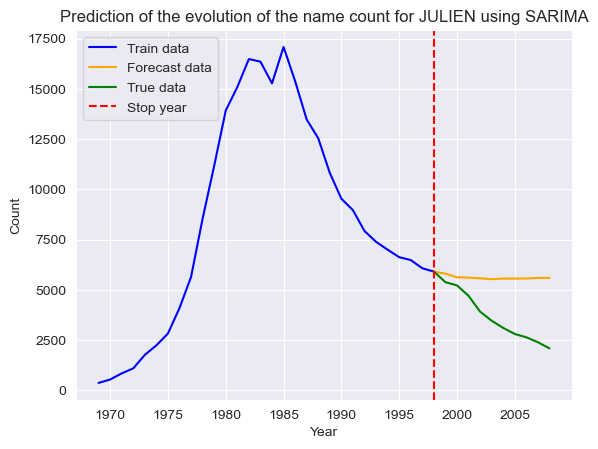

Area under the curve for Prophet: -43672.461643897674
Area under the curve for SARIMA: -18347.733296985913


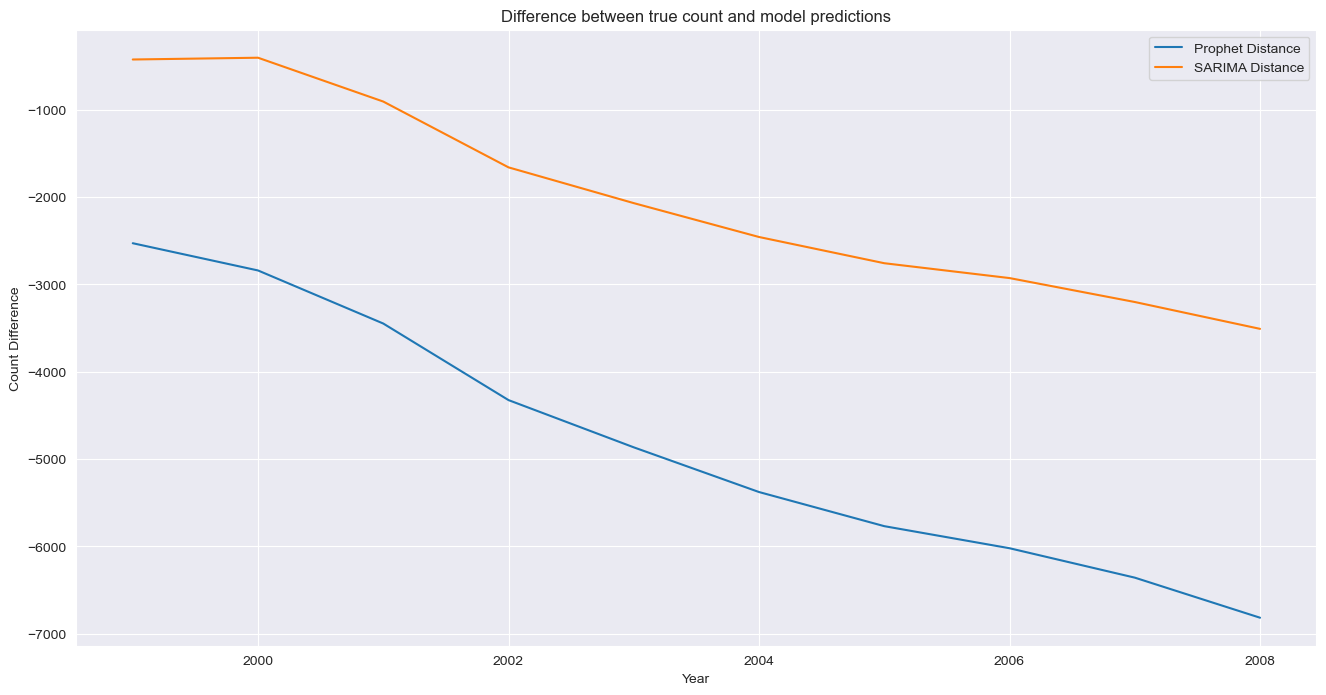

In [120]:
julien_df = investigate_predictions(global_names, "JULIEN", 1998, 10, plot=True)